# **Trabajo Práctico 1 : Reservas de Hotel**

# Grupo 33
#Integrantes:
1.   Mendoza Hernandez, Sabrina Scarlet (108524)
2.   Valeriani, Matias Gabriel (108570)
3.   Jang, Lucas (109151)





#Importar librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

import scipy.stats as st

from scipy import linalg
import scipy.linalg as sc
from numpy.linalg import inv
from scipy.linalg import sqrtm


#Lectura del dataset

In [ ]:
import pandas as pd
reservas = pd.read_csv('https://drive.google.com/uc?export=download&id=1sGSkfm-Su-Mk_Ib_u1M8DOUfpSLpPfz1')
hotels = reservas.copy()
print(f"La cantidad de filas son {len(hotels)} y la cantidad de columnas son {len(hotels.columns)}\n")
print(hotels.columns)
hotels.head(3)

La cantidad de filas son 61913 y la cantidad de columnas son 33

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'id', 'is_canceled'],
      dtype='object')


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.5,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.0,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,NaN,0,Transient,229.0,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0


#Análisis exploratorio y preprocesamiento de datos

## a) Exploración inicial
En este apartado realizaremos un analisis de las variables presentes en el dataset, asi como tambien una distinción entre variables cuantitativas y variables cualitativas. Tambien haremos un analisis de las variables que consideremos irrelevantes para nuestro propósito.
Además presentaremos gráficos para conocer las distribucaciones de las mismas, y las correlacion que presentan entre si las variables cuantitativas.
Por último, mostraremos la relacion que presentan las principales variables con el target, es decir la variable *is_canceled*, la cual nos servirá para el analisis de nuestro trabajo.

####**Tipo de variables**



In [ ]:
hotels.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

####**Analisis de variables**
Las variables que se presentan en este dataset se dividen en :

#####●  Cualitativas(categoricas):
> * *Ordinales* (Se pueden ordenar las modalidades que adopta)
> * *Nominales* (No se puede establecer un ordenamiento entre ellas)

#####●  Cuantitativas(numericas):
> * *Discretas* (Admite valores enteros)
> * *Continuas* (Admite valores reales)

Las variables **cuantitativas** mencionadas son las siguientes:

* **lead_time** (discreta)
* **arrival_date_year** (discreta)
* **arrival_date_week_number** (discreta)
* **arrival_date_day_of_month** (discreta)
* **stays_in_weekend_nights** (discreta)
* **stays_in_week_nights** (discreta)                
* **adults** (discreta)
* **children** (discreta)
* **babies** (discreta)
* **previous_cancellations** (discreta)
* **previous_bookings_not_canceled** (discreta)
* **booking_changes** (discreta)
* **days_in_waiting_list** (discreta)
* **adr** (continua)
* **required_car_parking_spaces** (discreta)
* **total_of_special_requests** (discreta)

    
A continuacion se muestran las medidas de resumen de las variables mencionadas:

In [ ]:
variables_cuantitativas = [
    'lead_time',
    'arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',    
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
    ]
    
ds_cuantitativo = hotels.loc[:,variables_cuantitativas]
ds_resumen_cuantitativo = pd.DataFrame()
ds_resumen_cuantitativo["Media"] = ds_cuantitativo.mean().round(2)
ds_resumen_cuantitativo["Mediana"] = ds_cuantitativo.median()
ds_resumen_cuantitativo["Moda"] = ds_cuantitativo.mode().iloc[0]
ds_resumen_cuantitativo["Maximo"] = ds_cuantitativo.max()
ds_resumen_cuantitativo["Minimo"] = ds_cuantitativo.min()

ds_resumen_cuantitativo

,Media,Mediana,Moda,Maximo,Minimo
lead_time,112.25,78.0,0.0,629.0,0.00
arrival_date_year,2016.15,2016.0,2016.0,2017.0,2015.00
arrival_date_week_number,27.22,28.0,33.0,53.0,1.00
arrival_date_day_of_month,15.79,16.0,17.0,31.0,1.00
stays_in_weekend_nights,0.92,1.0,0.0,16.0,0.00
stays_in_week_nights,2.51,2.0,2.0,40.0,0.00
adults,1.86,2.0,2.0,55.0,0.00
children,0.10,0.0,0.0,10.0,0.00
babies,0.01,0.0,0.0,9.0,0.00
previous_cancellations,0.11,0.0,0.0,26.0,0.00


Las variables **cualitativas** mencionadas son las siguientes:

* **hotel** (nominal)
* **arrival_date_month** (ordinal)
* **meal** (nominal)
* **country** (nominal)
* **market_segment** (nominal)
* **distribution_channel** (nominal)
* **reserved_room_type** (ordinal)
* **assigned_room_type** (ordinal)
* **deposit_type** (ordinal)
* **agent** (nominal)
* **customer_type** (nominal)
* **reservation_status** (nominal)
* **reservation_status_date** (ordinal)
* **id** (nominal)
* **is_canceled** (ordinal)
* **is_repeated_guest** (ordinal)
* **company** (nominal)



In [ ]:
variables_cualitativas = [
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'customer_type',
    'reservation_status',
    'reservation_status_date',
    'id',
    'is_canceled',
    'is_repeated_guest', 
    'company',
]
ds_cualitativo = hotels.loc[:,variables_cualitativas]

*   Mostrar cantidad de valores posibles

In [ ]:
ds_cualitativo.nunique()

hotel                          2
arrival_date_month            12
meal                           5
country                      149
market_segment                 8
distribution_channel           5
reserved_room_type            10
assigned_room_type            12
deposit_type                   3
agent                        296
customer_type                  4
reservation_status             3
reservation_status_date      915
id                         61913
is_canceled                    2
is_repeated_guest              2
company                      276
dtype: int64

*   Mostrar Frecuencia de valores

In [ ]:
ds_cualitativo.hotel.value_counts(normalize=True)*100

City Hotel      68.045483
Resort Hotel    31.954517
Name: hotel, dtype: float64

In [ ]:
ds_cualitativo.arrival_date_month.value_counts(normalize=True)*100

August       11.590458
July         10.537367
May           9.947830
April         9.493967
October       9.469740
June          9.322759
September     9.075638
March         7.912716
February      6.662575
December      5.641788
November      5.498038
January       4.847124
Name: arrival_date_month, dtype: float64

In [ ]:
ds_cualitativo.meal.value_counts(normalize=True)*100

BB           77.264872
HB           12.036244
SC            8.973883
Undefined     0.954565
FB            0.770436
Name: meal, dtype: float64

In [ ]:
ds_cualitativo.market_segment.value_counts(normalize=True)*100

Online TA        47.274401
Offline TA/TO    20.002261
Groups           18.647134
Direct            9.298532
Corporate         4.012081
Complementary     0.579846
Aviation          0.182514
Undefined         0.003230
Name: market_segment, dtype: float64

In [ ]:
ds_cualitativo.distribution_channel.value_counts(normalize=True)*100

TA/TO        83.744932
Direct       10.981539
Corporate     5.123318
GDS           0.143750
Undefined     0.006461
Name: distribution_channel, dtype: float64

In [ ]:
ds_cualitativo.reserved_room_type.value_counts(normalize=True)*100

A    72.899068
D    15.481401
E     5.247686
F     2.343611
G     1.760535
B     0.936798
C     0.778512
H     0.539467
P     0.011306
L     0.001615
Name: reserved_room_type, dtype: float64

In [ ]:
ds_cualitativo.assigned_room_type.value_counts(normalize=True)*100

A    64.618093
D    19.688918
E     6.103726
F     2.941224
G     2.062572
C     1.820296
B     1.705619
H     0.620225
I     0.234200
K     0.192205
P     0.011306
L     0.001615
Name: assigned_room_type, dtype: float64

In [ ]:
ds_cualitativo.deposit_type.value_counts(normalize=True)*100

No Deposit    83.480045
Non Refund    16.393972
Refundable     0.125983
Name: deposit_type, dtype: float64

In [ ]:
ds_cualitativo.agent.value_counts(normalize=True)*100

9.0      31.475483
240.0    13.671955
1.0       8.189105
14.0      3.146808
6.0       3.033893
           ...    
420.0     0.001851
352.0     0.001851
450.0     0.001851
283.0     0.001851
25.0      0.001851
Name: agent, Length: 296, dtype: float64

In [ ]:
ds_cualitativo.customer_type.value_counts(normalize=True)*100

Transient          76.638186
Transient-Party    19.653385
Contract            3.283640
Group               0.424790
Name: customer_type, dtype: float64

In [ ]:
ds_cualitativo.reservation_status.value_counts(normalize=True)*100

Check-Out    50.025035
Canceled     48.593995
No-Show       1.380970
Name: reservation_status, dtype: float64

In [ ]:
ds_cualitativo.is_canceled.value_counts(normalize=True)*100

0    50.025035
1    49.974965
Name: is_canceled, dtype: float64

In [ ]:
ds_cualitativo.is_repeated_guest.value_counts(normalize=True)*100

0    97.200911
1     2.799089
Name: is_repeated_guest, dtype: float64

In [ ]:
ds_cualitativo.country.value_counts(normalize=True)*100

PRT    45.305712
GBR     9.292939
FRA     7.795176
ESP     6.824224
DEU     5.368605
         ...    
HND     0.001621
FJI     0.001621
LIE     0.001621
ATA     0.001621
RWA     0.001621
Name: country, Length: 149, dtype: float64

In [ ]:
ds_cualitativo.reservation_status_date.value_counts(normalize=True)*100

2015-10-21    1.636167
2015-07-06    0.886728
2015-01-01    0.872192
2016-11-25    0.849579
2016-01-18    0.696138
                ...   
2015-05-08    0.001615
2015-03-12    0.001615
2015-02-12    0.001615
2015-01-28    0.001615
2015-01-29    0.001615
Name: reservation_status_date, Length: 915, dtype: float64

####**Variables irrelevantes**
Consideramos irrelevantes las variables *arrival_date_day_of_month* y *arrival_date_month* ya que no hay fechas destacadas en las que influya la cancelacion de una reserva.





In [ ]:
hotels.drop(['arrival_date_month','arrival_date_day_of_month', 'reservation_status_date'], axis=1, inplace = True)

Tambien con las variables *meal* y *babies* vimos que se distribuyen de la misma manera con respecto a las reservas que se cancelaron y no cancelaron.
El mismo caso sucede con *reservation_status* ya que muestra los mismos valores que se presentan en *is_canceled*. 

In [ ]:
hotels.drop(['meal','babies','reservation_status'], axis=1, inplace = True)

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_week_number        61913 non-null  int64  
 4   stays_in_weekend_nights         61913 non-null  int64  
 5   stays_in_week_nights            61913 non-null  int64  
 6   adults                          61913 non-null  int64  
 7   children                        61909 non-null  float64
 8   country                         61692 non-null  object 
 9   market_segment                  61913 non-null  object 
 10  distribution_channel            61913 non-null  object 
 11  is_repeated_guest               61913 non-null  int64  
 12  previous_cancellations          

####**Grafico de variables**
* Graficamos algunas variables cualitativas para una mejor interpretacion de las mismas

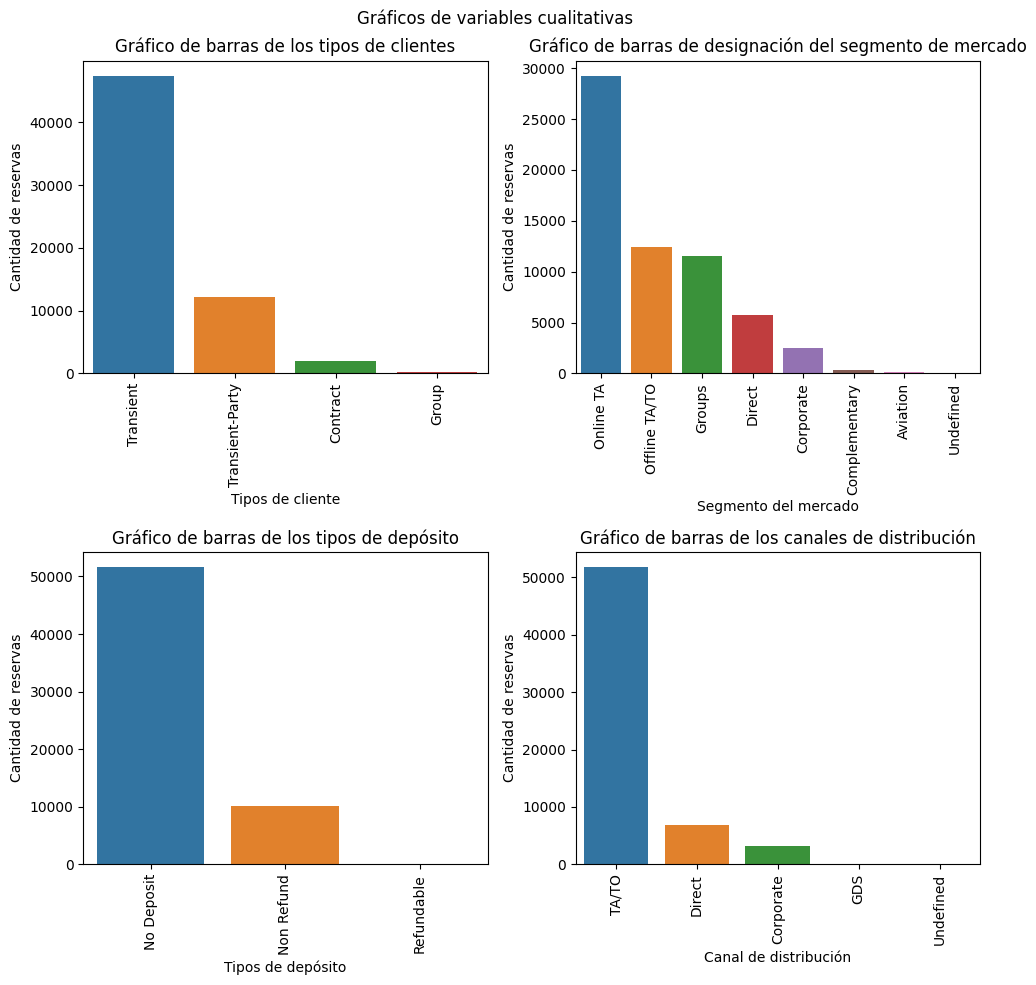

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.suptitle('Gráficos de variables cualitativas')

canal = hotels['distribution_channel'].value_counts()
sns.barplot(x=canal.index, y=canal.values).set(title='Gráfico de barras de los canales de distribución',xlabel='Canal de distribución', ylabel='Cantidad de reservas')
plt.sca(axes[0, 0])
plt.xticks(rotation=90)

customer = hotels['customer_type'].value_counts()
sns.barplot(x=customer.index, y=customer.values).set(title='Gráfico de barras de los tipos de clientes',xlabel='Tipos de cliente', ylabel='Cantidad de reservas')
plt.sca(axes[0, 1])
plt.xticks(rotation=90)

market = hotels['market_segment'].value_counts()
sns.barplot(x=market.index, y=market.values).set(title='Gráfico de barras de designación del segmento de mercado',xlabel='Segmento del mercado', ylabel='Cantidad de reservas')
plt.sca(axes[1, 0])
plt.xticks(rotation=90)

deposit = hotels['deposit_type'].value_counts()
sns.barplot(x=deposit.index, y=deposit.values).set(title='Gráfico de barras de los tipos de depósito',xlabel='Tipos de depósito', ylabel='Cantidad de reservas')
plt.sca(axes[1, 1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

> * Grafico de barras de *tipo de cliente*: Se observa que la mayoria de las reservas corresponden a clientes transitorios. La gran minoria corresponden a contratos y/o grupos.

> * Grafico de barras de *segmento de mercado*: En este grafico de barras se muestra la cantidad de reservas de cada segmento de mercado al que pertenece el cliente que realiza la reserva. Por mayoria la cantidad de las reservas corresponden a Online TA, seguido por Offline TA/TO y Groups. 

> * Grafico de barras de *tipo de deposito*: La mayoria de las reservas realizadas no fueron pagas en lo absoluto, es decir no se realizó ningún depósito. Luego hay aproximadamente 10.000 reservas que corresponden a "Non Refund", esto quiere deicr que se realizó un depósito en el valor del costo total de la estadia, el cual no tiene reembolso. Por último, la gran minoría pertenece a "Refundable" el cual dice que se realizó un depósito con un valor bajo el costo total de la estadía.

> * Grafico de barras de *canal de distribucion*: en este grafico se muestran los valores que admite la variable de canales de distribución. Estos son los canales a traves de los cuales se realizó la reserva. 

* Graficamos algunas variables cuantitativas para una mejor interpretacion de las mismas

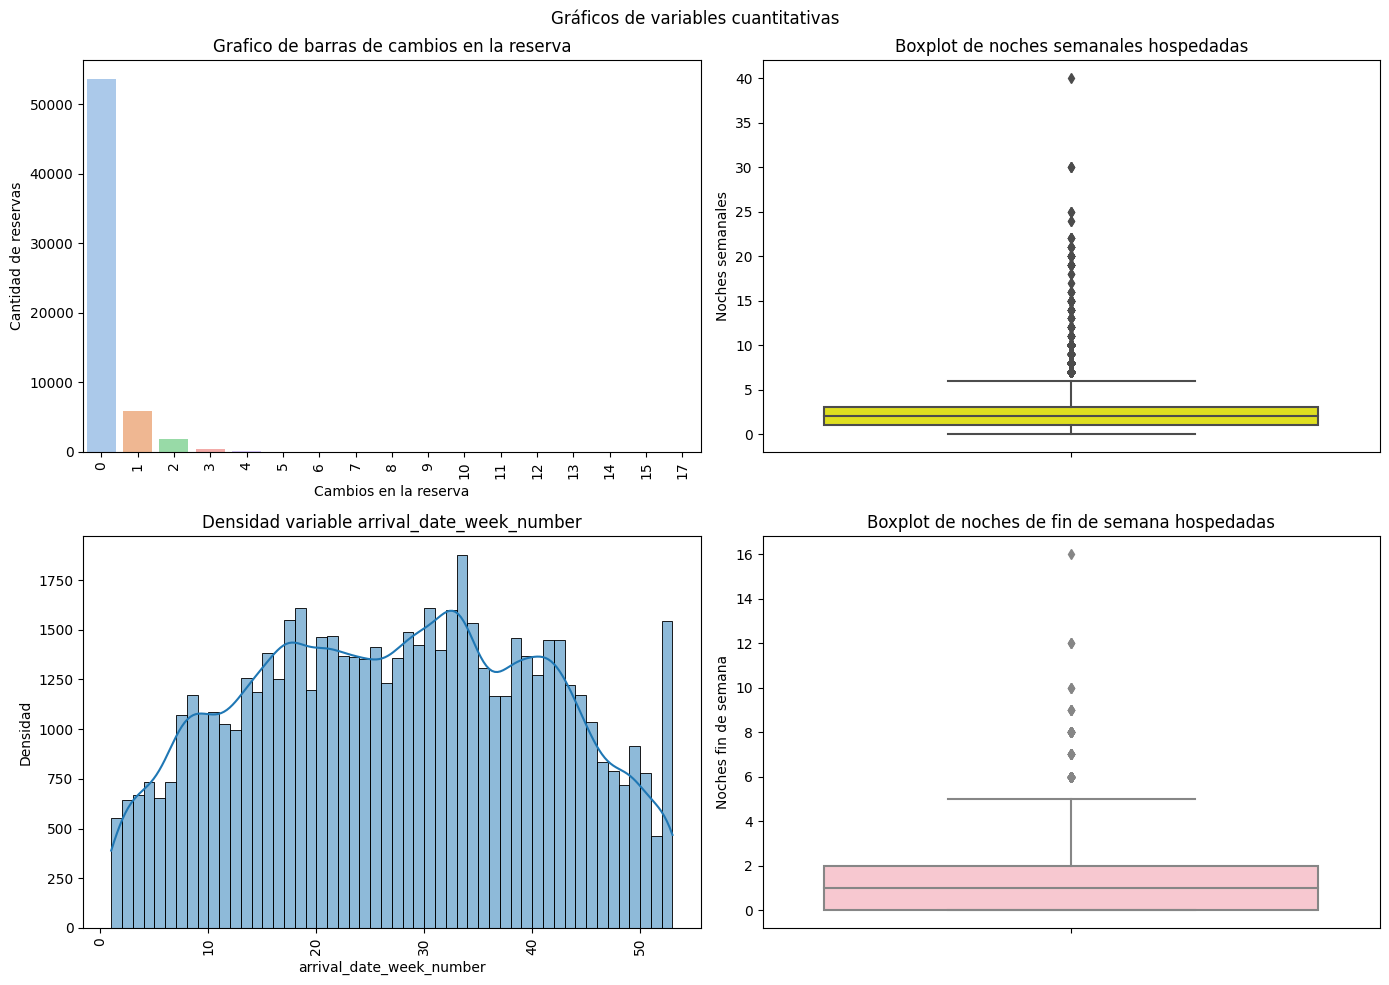

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
fig.suptitle('Gráficos de variables cuantitativas')

sns.boxplot(y='stays_in_weekend_nights', data=hotels, color = "pink").set(title='Boxplot de noches de fin de semana hospedadas', ylabel='Noches fin de semana')
plt.sca(axes[0, 0])
plt.xticks(rotation=90)

cambios_reserva = hotels['booking_changes'].value_counts()
sns.barplot(x=cambios_reserva.index, y=cambios_reserva.values, palette = "pastel").set(title='Grafico de barras de cambios en la reserva', xlabel='Cambios en la reserva', ylabel='Cantidad de reservas')
plt.sca(axes[0, 1])
plt.xticks(rotation=90)

sns.boxplot(y='stays_in_week_nights', data=hotels, color = "yellow").set(title='Boxplot de noches semanales hospedadas', ylabel='Noches semanales')
plt.sca(axes[1, 0])
plt.xticks(rotation=90)

sns.histplot(data=hotels['arrival_date_week_number'], kde=True, alpha=0.5, bins=52).set(title="Densidad variable arrival_date_week_number", xlabel="arrival_date_week_number", ylabel="Densidad")
plt.sca(axes[1, 1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

> * Boxplot de *noches semanales hospedadas*: El mayor rango de alojamientos se observa entre 1 y 3 noches semanales. Mientras que la mediana se observa en 2 noches. Los valores superiores a 6-7 noches los considera como outliers.

> * Grafico de barras *cambios en la reserva*: La mayor cantidad de clientes, no han realizado cambios en la reserva. Solo una gran minoría ha realizado 1 o 2 cambios en la misma. Luego hay algunos casos aislados de casos en los que se han realizado mas de 2 cambios.

> * Grafico de densidad de *numero de semana de fecha de llegada*: se observa que las semanas del año con mas cantidad de reservas oscilan entre la semana 25-35, donde alcanza su pico maximo en ese período. En las primeras 5 semanas y en las ultimas 5 semanas (salvo en la ultima del año) es donde se encuentran la menor cantidad de arrivos.

> * Boxplot de *noches fin de semana hospedadas*: El mayor rango de alojamientos se observa entre 0 y 2 noches de fin se semana. Mientras que la mediana se observa en 1 noche. Los valores superiores a 5 noches los considera como outliers.

####**Correlacion de variables**

* Graficamos la matriz de correlacion entre los features

Previo a la muestra de la matriz de correlaciones, actualizamos nuestra lista de variables cuantitativas

In [ ]:
variables_cuantitativas2 = [
    'lead_time',
    'arrival_date_year',
    'arrival_date_week_number',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
    ]

<Axes: >

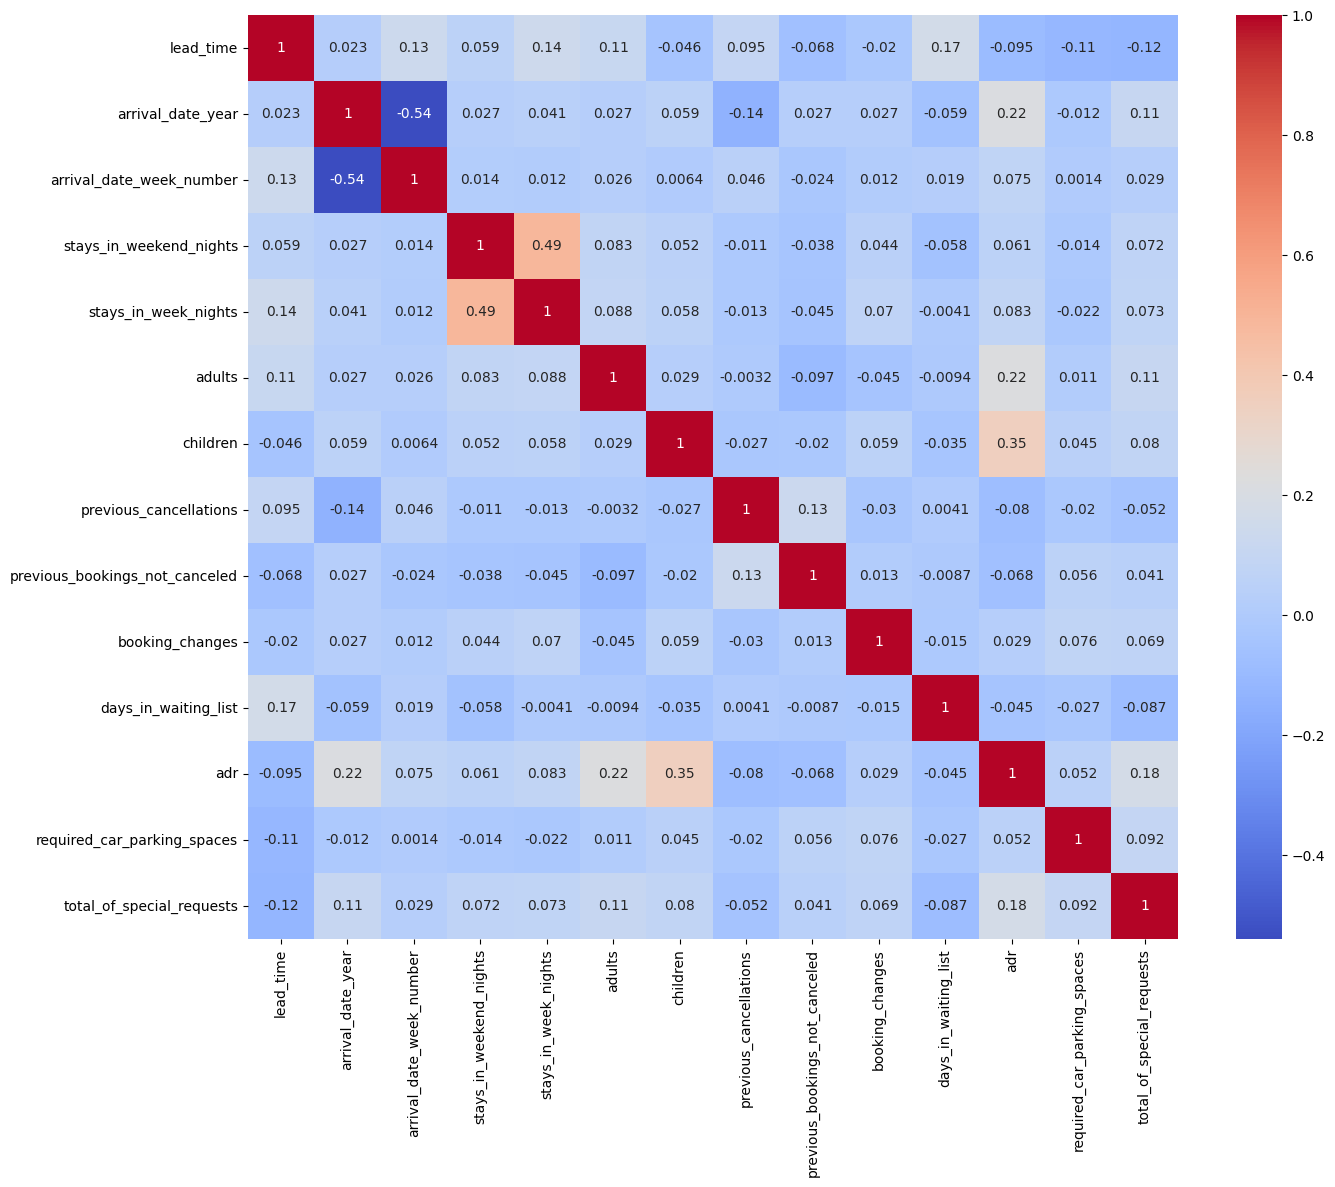

In [ ]:
plt.figure(figsize = (15,12))
df_variables = hotels[variables_cuantitativas2]
matriz_correlaciones = df_variables.corr()
sns.heatmap(data=matriz_correlaciones, annot=True, cmap='coolwarm')

([<matplotlib.axis.XTick at 0x7f09d7e0ea00>,
 [Text(2015, 0, '2015'), Text(2016, 0, '2016'), Text(2017, 0, '2017')])

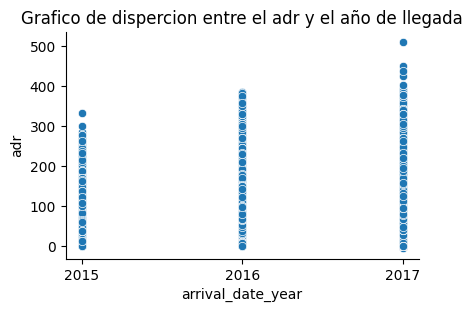

In [ ]:
sns.relplot(data=hotels, x='arrival_date_year', y='adr', height=3, aspect=1.5).set(title="Grafico de dispercion entre el adr y el año de llegada")
plt.xticks(range(int(min(hotels['arrival_date_year'])), int(max(hotels['arrival_date_year']))+1))

Se observa una correlacion positiva entre estas dos variables ya que a medida que el año es mayor, mayor será el adr.




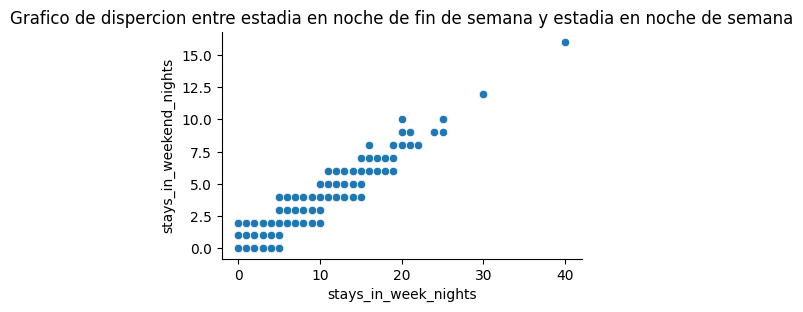

In [ ]:
sns.relplot(data=hotels, x='stays_in_week_nights', y='stays_in_weekend_nights', height=3, aspect=1.5).set(title="Grafico de dispercion entre estadia en noche de fin de semana y estadia en noche de semana")

Se observa una correlacion positiva entre estas dos variables. Por tal motivo decidimos crear una nueva variable *total_nights* que cuente con la suma de *stays_in_week_nights* y *stays_in_weekend_nights*

In [ ]:
hotels['total_nights'] = hotels['stays_in_week_nights'] + hotels['stays_in_weekend_nights']

#### **Relacion variables vs. target**
* Graficamos algunas variables en relacion con el **target** *is_canceled*

[Text(0.5, 1.0, 'Grafico de barras de hoteles vs cancelaciones'),
 Text(0.5, 0, 'Hotel'),
 Text(0, 0.5, 'Cantidad de reservas')]

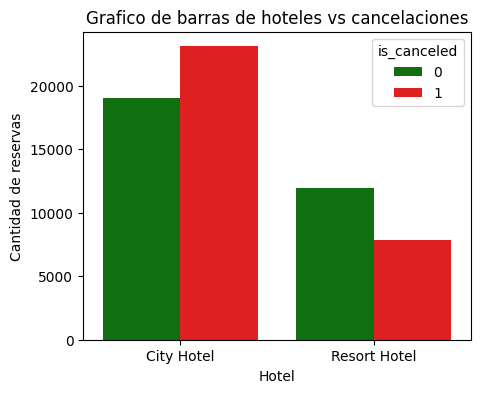

In [ ]:
plt.figure(figsize = (5,4))
sns.countplot(data=hotels, x='hotel', hue='is_canceled',palette= ['g','r']).set(title='Grafico de barras de hoteles vs cancelaciones', xlabel="Hotel", ylabel="Cantidad de reservas")

Se observa que en el City Hotel hay una mayor cantidad de reservas que en Resort Hotel, pero en City Hotel mas de la mitad de sus reservas fueron canceladas, mientras que en Resort Hotel mas de la mitad no fueron canceladas.

<Figure size 400x500 with 0 Axes>

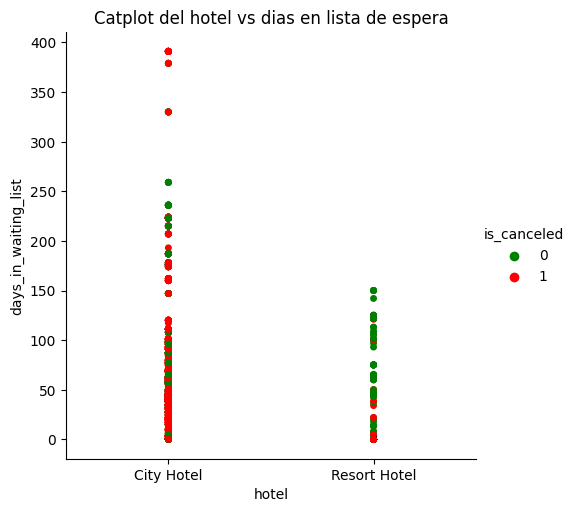

In [ ]:
plt.figure(figsize = (4,5))
sns.catplot(data=hotels, x='hotel', y='days_in_waiting_list', hue="is_canceled", palette= ['g','r'], jitter=False).set(title='Catplot del hotel vs dias en lista de espera')

Se muestra que en el City Hotel hay mayor cantidad de cancelaciones mientras menos dias estén en lista de espera. Ya cuando estan mas de 100 dias en lista de espera, se observa que la relacion cancelacion/no cancelacion es mas variada. En cuanto al Resort Hotel no brinda tanta informacion, pero viendo el grafico no muestra cancelaciones en base a la cantidad de dias en lista de espera.

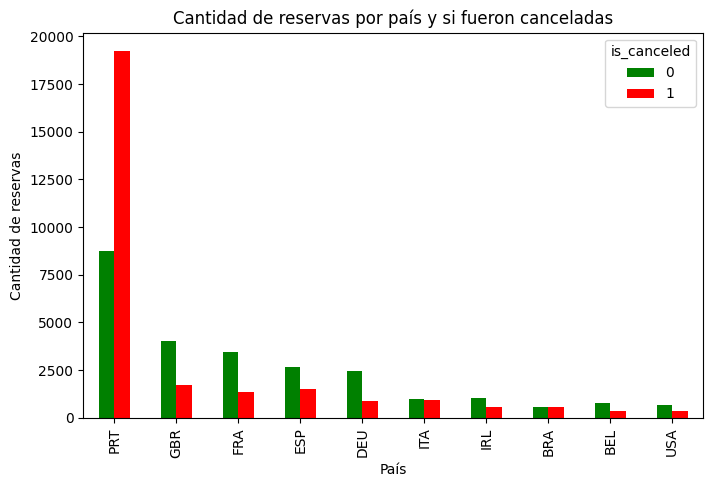

In [ ]:
country_counts = hotels['country'].value_counts()

grouped = hotels.groupby(['country', 'is_canceled']).size().unstack()

grouped['count'] = country_counts

grouped = grouped.sort_values(by='count', ascending=False)

grouped = grouped.head(10)

# Eliminar la columna "count" del DataFrame
grouped = grouped.drop('count', axis=1)

grouped.plot(kind='bar', stacked=False, color=['g', 'r'], figsize=(8, 5))

plt.title('Cantidad de reservas por país y si fueron canceladas')
plt.xlabel('País')
plt.ylabel('Cantidad de reservas')

plt.show()


Portugal es ampliamente el pais con mayor cantidad de reservas, pero un tercio de las mismas son canceladas. Observamos que en el resto de los paises mas concurridos, se ve una tasa de cancelacion menor al 50% de las reservas solicitadas. 

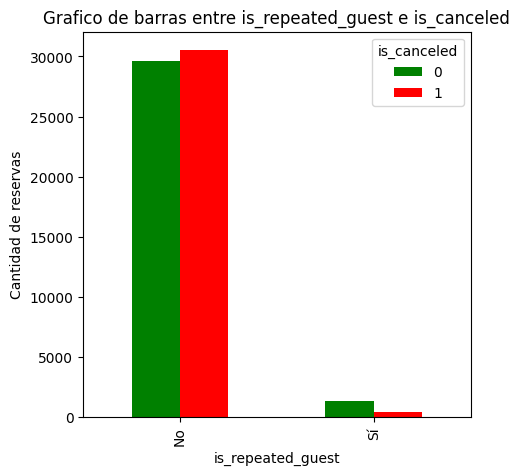

In [ ]:
ct = pd.crosstab(hotels['is_repeated_guest'], hotels['is_canceled'])


# Visualizar la tabla de contingencia con un gráfico de barras agrupado
ct.plot(kind='bar', stacked=False, color=['g', 'r'], figsize=(5, 5))


# Agregar título y etiquetas de los ejes
plt.title('Grafico de barras entre is_repeated_guest e is_canceled')
plt.xlabel('is_repeated_guest')
plt.ylabel('Cantidad de reservas')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

La mayoria de las reservas son realizadas por huespedes que no hicieron anterioremente una reserva. Ademas se observa que de los huespedes repetidos, la gran mayoria no cancela la reserva. En el caso de los nuevos huespedes, no brinda mucha informacion con respecto a la cancelacion ya que es muy parejo el indice de cancelacion.

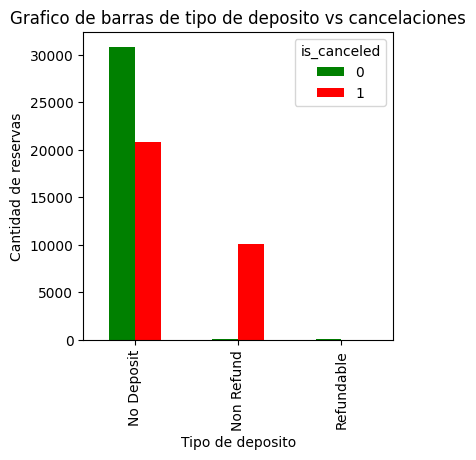

In [ ]:
deposit_counts = hotels['deposit_type'].value_counts()

grouped = hotels.groupby(['deposit_type', 'is_canceled']).size().unstack()

grouped['count'] = deposit_counts

grouped = grouped.sort_values(by='count', ascending=False)

grouped = grouped.drop('count', axis=1)

grouped.plot(kind='bar', stacked=False, color=['g', 'r'], figsize=(4, 4))

plt.title('Grafico de barras de tipo de deposito vs cancelaciones')
plt.xlabel('Tipo de deposito')
plt.ylabel('Cantidad de reservas')

plt.show()

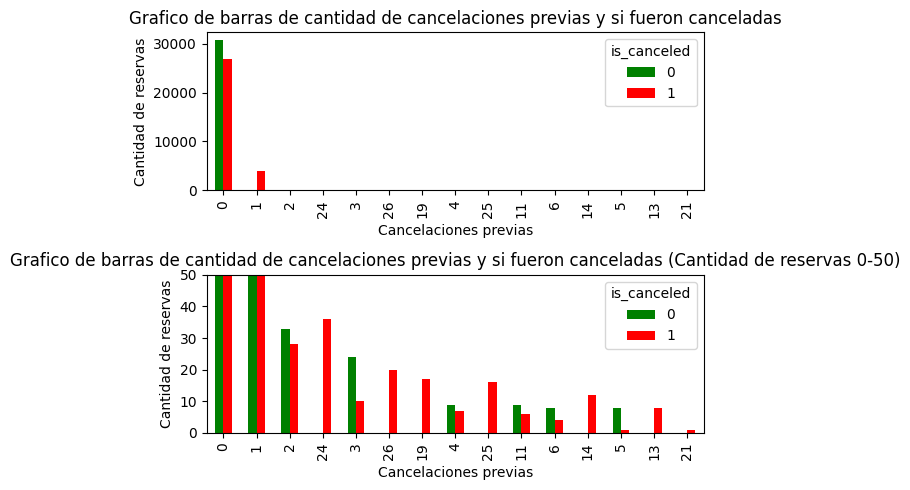

In [ ]:
#Hago ax.set_ylim(0, 50) para fijarme con mas profundidas en los que hicieron mas de 1 cancelacion previa, ya que los que hicieron 0 o 1 cancelacion previa, no nos dan mucha info

cancelaciones_counts = hotels['previous_cancellations'].value_counts()

grouped = hotels.groupby(['previous_cancellations', 'is_canceled']).size().unstack()

grouped['count'] = cancelaciones_counts

grouped = grouped.sort_values(by='count', ascending=False)

grouped = grouped.drop('count', axis=1)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

grouped.plot(kind='bar', stacked=False, color=['g', 'r'], ax=ax1, figsize=(6, 5))

ax1.set_title('Grafico de barras de cantidad de cancelaciones previas y si fueron canceladas')
ax1.set_xlabel('Cancelaciones previas')
ax1.set_ylabel('Cantidad de reservas')

ax2 =grouped.plot(kind='bar', stacked=False, color=['g', 'r'], ax=ax2, figsize=(6, 5))
ax2.set_ylim(0, 50)

ax2.set_title('Grafico de barras de cantidad de cancelaciones previas y si fueron canceladas (Cantidad de reservas 0-50)')
ax2.set_xlabel('Cancelaciones previas')
ax2.set_ylabel('Cantidad de reservas')

plt.tight_layout()

plt.show()

Se observa que cuando alguien hizo mas de 11 cancelaciones previas, la probabilidad de cancelacion es muy alta en comparacion a los que no hicieron cancelaciones. Los que hicieron entre 1 y 11 cancelaciones previas, se muestra un porcentaje de cancelacion bastante variado. 

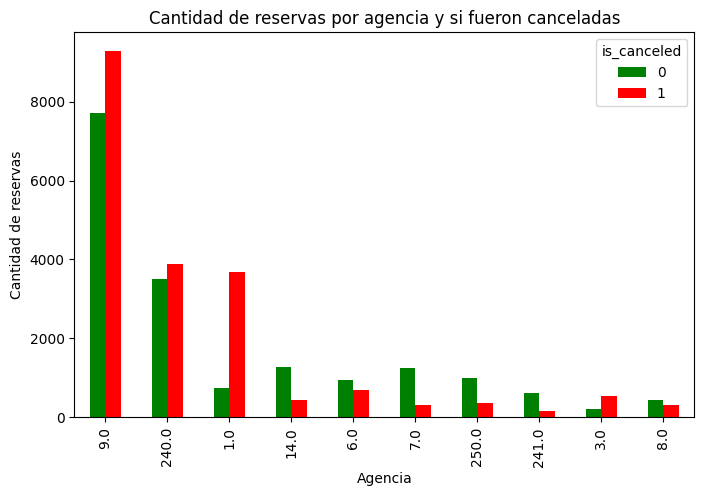

In [ ]:
agent_counts = hotels['agent'].value_counts()

grouped = hotels.groupby(['agent', 'is_canceled']).size().unstack()

grouped['count'] = agent_counts

grouped = grouped.sort_values(by='count', ascending=False)

grouped = grouped.head(10)

grouped = grouped.drop('count', axis=1)

grouped.plot(kind='bar', stacked=False, color=['g', 'r'], figsize=(8, 5))

plt.title('Cantidad de reservas por agencia y si fueron canceladas')
plt.xlabel('Agencia')
plt.ylabel('Cantidad de reservas')

plt.show()

Aca observamos que con algunas agencias, como la numero 1, es bastante probable que cancelen y en otras lo contrario. Por lo que parece la variable target puede estar relacionada con la agencia con la que se realizo la reservacion.

[Text(0.5, 0, 'No Cancelado'), Text(1.5, 0, 'Cancelado')]

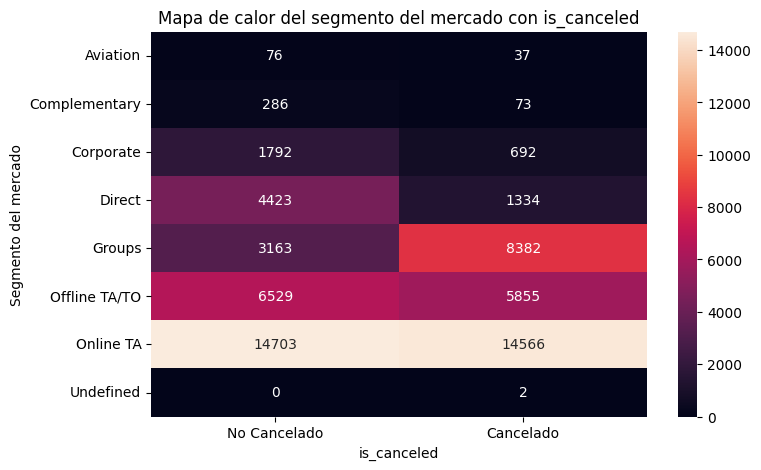

In [ ]:
tabla=pd.crosstab(hotels['market_segment'], hotels['is_canceled'])
fig, ax = plt.subplots(figsize=(8, 5))
grf = sns.heatmap(tabla, annot=True, fmt='g')
grf.set(title="Mapa de calor del segmento del mercado con is_canceled", xlabel="is_canceled", ylabel="Segmento del mercado")
grf.set_xticklabels(['No Cancelado', 'Cancelado'])



En el siguiente mapa de calor se observa que hay segmentos del mercado en los que predomina mas las cancelaciones que en otros. Por ejemplo es el caso de Groups en el que dos tercios del total de las reservas han sido canceladas. Distinto es el caso de Direct o Corporate que mas de la mitad de las reservas no fueron canceladas.

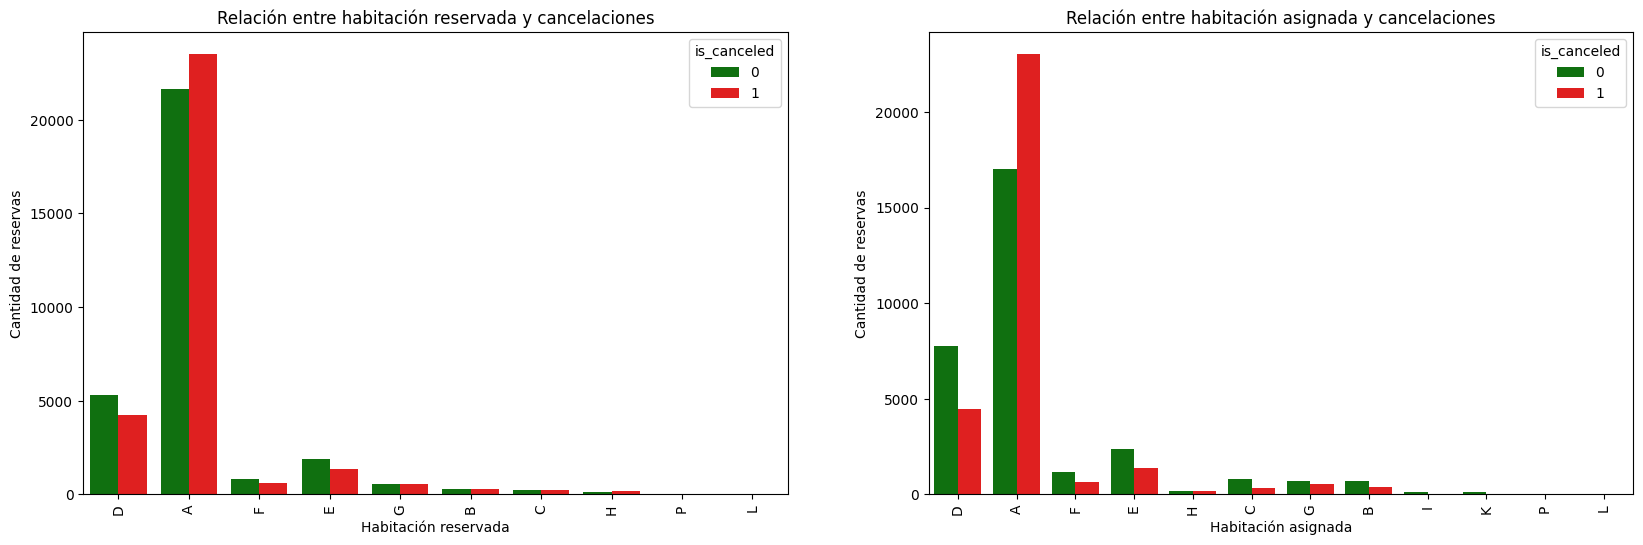

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 6))

sns.countplot(data=hotels, x='reserved_room_type', hue='is_canceled',palette= ['green','red'], ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_xlabel('Habitación reservada')
axs[0].set_ylabel('Cantidad de reservas')
axs[0].set_title('Relación entre habitación reservada y cancelaciones')

sns.countplot(data=hotels, x='assigned_room_type', hue='is_canceled',palette= ['green','red'], ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_xlabel('Habitación asignada')
axs[1].set_ylabel('Cantidad de reservas')
axs[1].set_title('Relación entre habitación asignada y cancelaciones')

plt.show()


En estos graficos se muestran las habitaciones reservadas/asignadas (el grafico de la izquierda indica habitaciones reservadas, mientras que el de la derecha refiere a habitaciones asignadas) y la cantidad de reservas que hay con esas habitaciones. Ademas se muestra la relación con el target, que denota si la reserva de esa habitacion ha sido cancelada o no.

## b) Visualizacion de datos
En esta sección se espera que puedan realizar una primera aproximación a los datos apoyándose en visualizaciones, por ejemplo: gráficos de dispersión entre variables, histogramas, heatmaps, exploración de las columnas, y cualquier otro gráfico adicional que se considere útil para nuestro análisis.

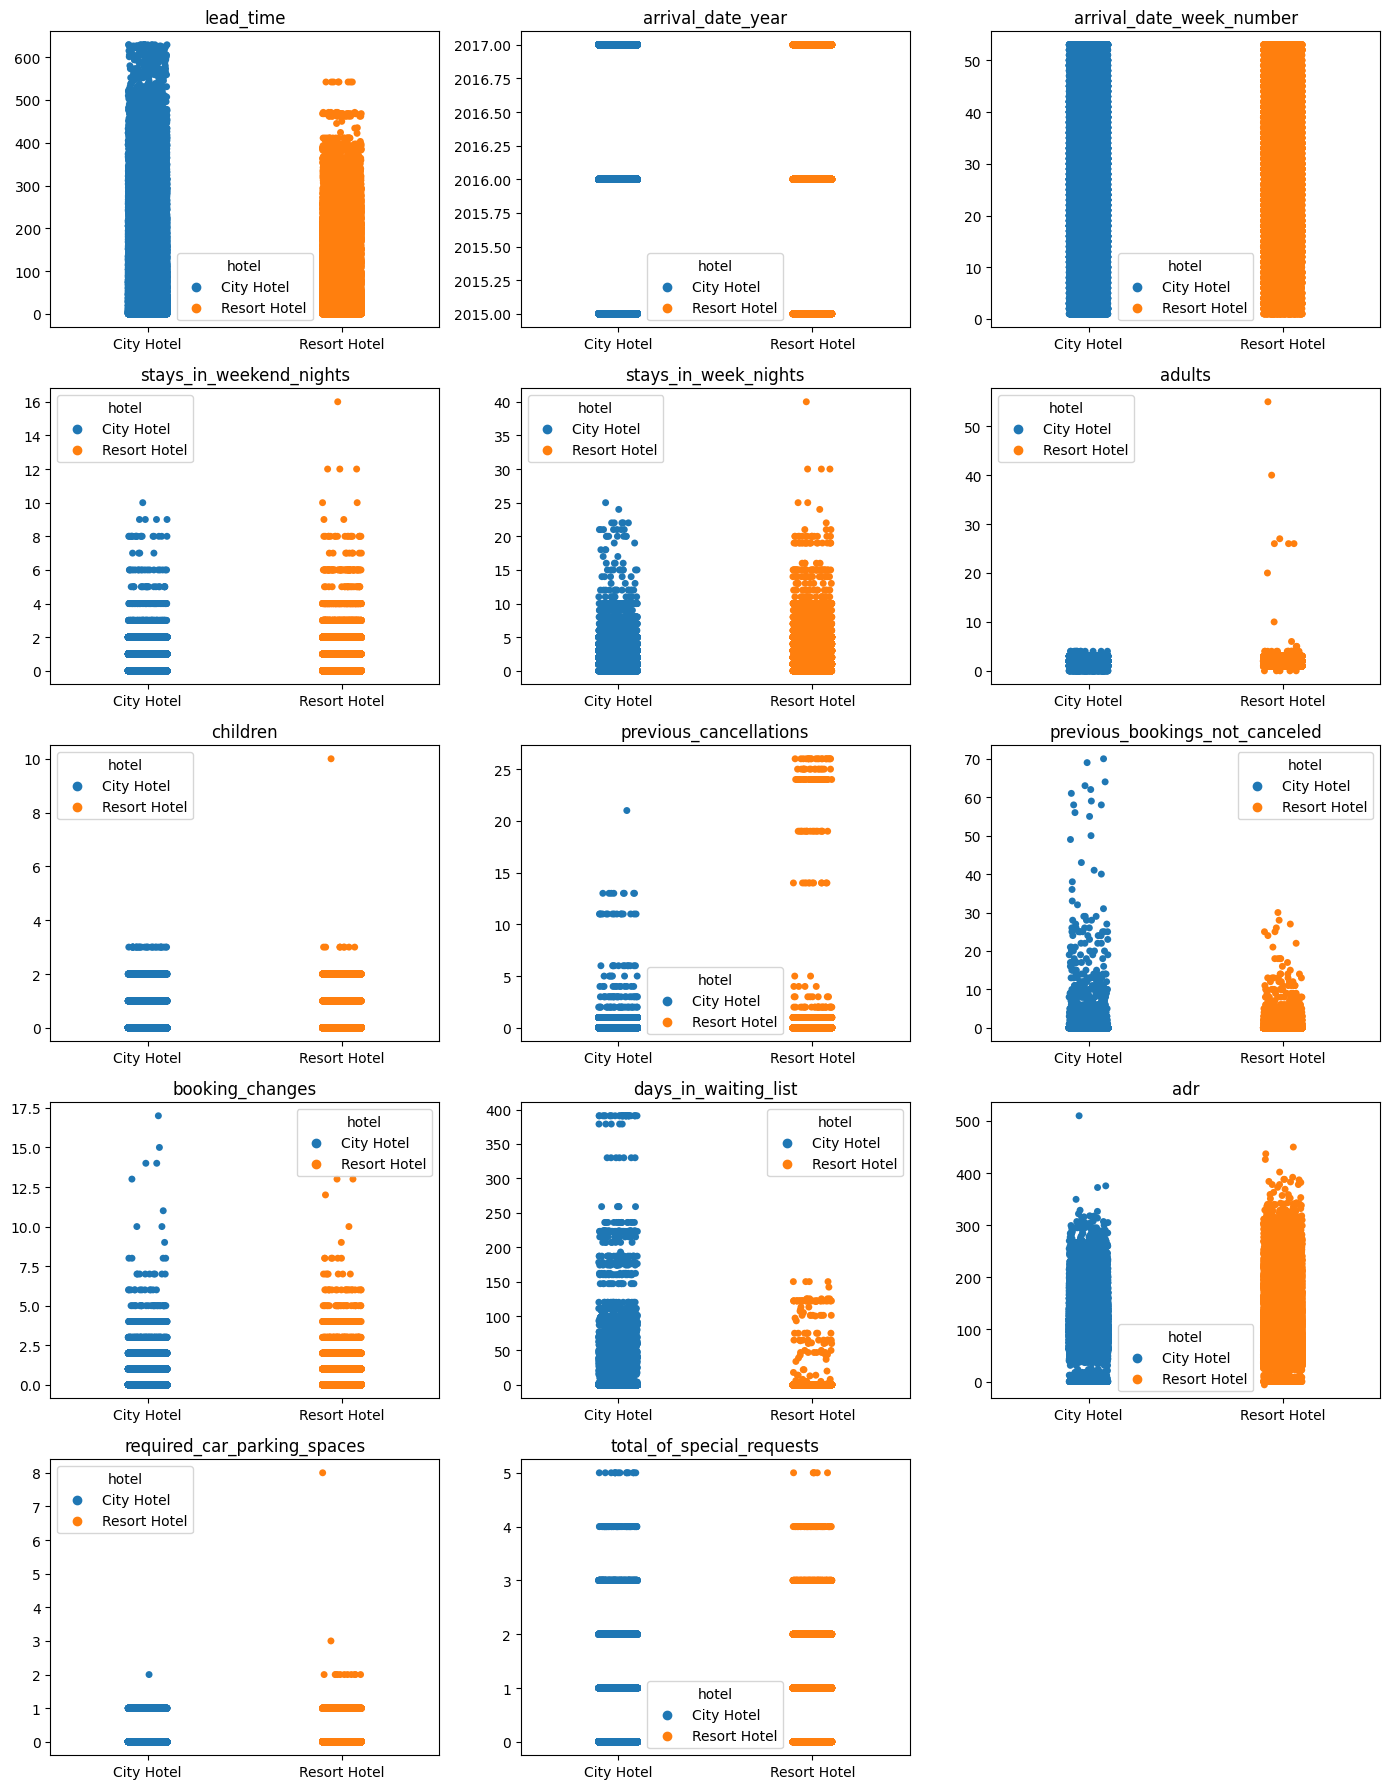

In [ ]:
n = 1
plt.figure(figsize = (14, 18))

for feature in variables_cuantitativas2:
    plt.subplot(5,3,n)
    sns.stripplot(x = hotels['hotel'], y = hotels[feature],hue=hotels['hotel']).set(xlabel = None, ylabel = None)
    plt.title(f'{feature}')
    n = n + 1
    plt.tight_layout()



>  El stripplot proporciona una buena visualización de los diferentes tipos de hotel y los patrones relacionados en el conjunto de datos. Para **lead_time**, podemos ver que el conjunto de datos del hotel resort se dispersa más en valores superiores a 400 días. En referencia al diagrama de caja y el histograma, la dispersión comenzó aproximadamente en 380 días. Para **stays_in_weekend_nights**, el conjunto de datos se dispersa para valores de datos por encima de 6 y 10 para ambos tipos de hotel. Para **adults**, el conjunto de datos dispersos es solo para el hotel resort, aunque en pequeña cantidad. El tipo de habitación es desconocido, por lo que generalizamos el número máximo de adultos por habitación por reserva en 4. Para **children**, se consideran valores extremos como valores atípicos y se establecen en 0. Para **booking_changes**, se asume que los cambios solo ocurren hasta 6 veces. Para **adr**, hay algunos valores elevados para el City Hotel. Para **days_in_waiting_lista**, se observa que en Resort Hotel hay menos tiempo para lista de espera.

In [ ]:
variables_pairplot = ['lead_time','adults','arrival_date_week_number','booking_changes','adr','required_car_parking_spaces','previous_bookings_not_canceled','previous_cancellations','is_canceled']
#sacamos children, arrival_date_year, total_of_special_requests
ds_pairplot = hotels.loc[:,variables_pairplot]

sns.set(style="ticks")
g = sns.pairplot(ds_pairplot, hue='is_canceled', height=2.5)

g.fig.suptitle("Relación entre variables en hoteles", y=1.05, fontsize=20)

plt.show()

> * En el grafico de dispersion de todas las variables cualitativas entre si, con la variable *is_canceled* nos ayudará a ver la correlacion entre las mismas, ademas poder identificar a futuro datos que esten aislados, lo que consideraremos como *outliers* entre mas de una variable.

<Figure size 400x800 with 0 Axes>

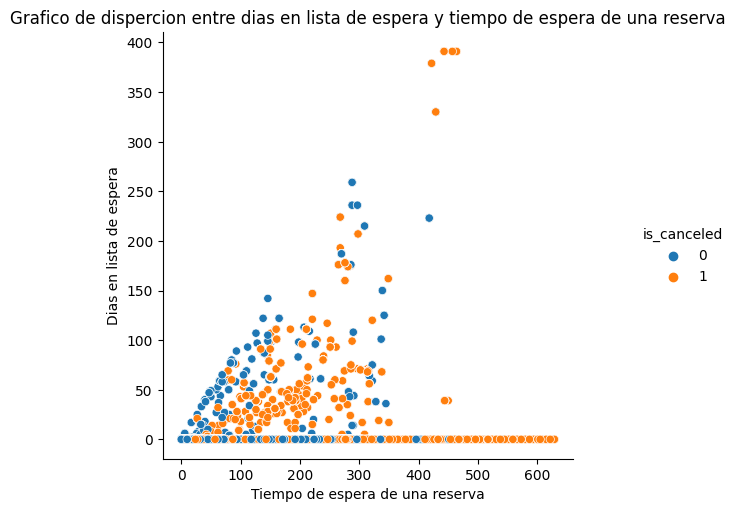

In [ ]:
plt.figure(figsize=(4,8))
graf_relplot=sns.relplot(data=hotels,x='lead_time', y='days_in_waiting_list',hue="is_canceled").set(title="Grafico de dispercion entre dias en lista de espera y tiempo de espera de una reserva",xlabel='Tiempo de espera de una reserva',ylabel='Dias en lista de espera')

> * En este gráfico se observa una correlatividad positiva entre las variables *lead_time* y *days_in_waiting_list*. Un dato importante es que a partir de los 400 dias en espera previo a realizar la reserva, las mismas son canceladas independientemente del tiempo que ha estado en lista de espera.



[Text(0.5, 1.0, 'Mapa de calor de fecha de llegadas de número de semana vs año'),
 Text(0.5, 102.72222222222219, 'Fecha de llegada año'),
 Text(45.722222222222214, 0.5, 'Fecha de llegada de número de semana')]

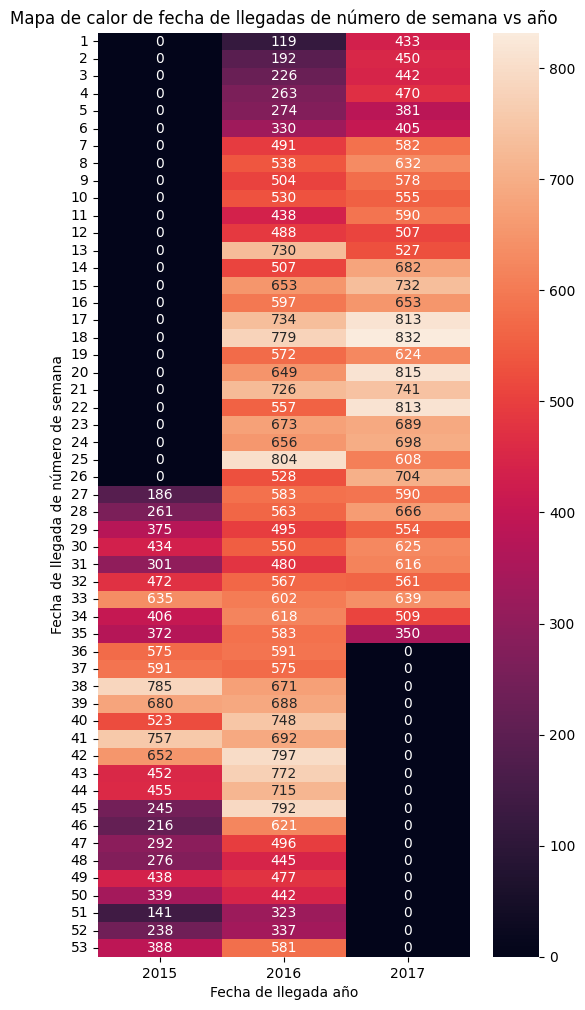

In [ ]:
#Correlacion negativa entre estas dos
tabla=pd.crosstab(hotels['arrival_date_week_number'], hotels['arrival_date_year'])
fig, ax = plt.subplots(figsize=(6, 12))
grf = sns.heatmap(tabla, annot=True, fmt='g')
grf.set(title="Mapa de calor de fecha de llegadas de número de semana vs año", xlabel="Fecha de llegada año", ylabel="Fecha de llegada de número de semana")

> * En el siguiente mapa de calor se relacionan las variables *arrival_date_week_number* con *arrival_date_year*, dando como resultado que en las primeras 26 semanas del año 2015 no hubo ninguna reserva. Sucede de similar manera en el año 2017, de la semana 36 en adelante no hubo reservas.

## c) Datos faltantes
Analizamos la presencia de datos faltantes en el dataset. Primeramente realizaremos un analisis de datos falltantes a nivel de columna para identificar las columnas que cuenten con valores nulos. Posteirormente graficaremos para cada variable el porcentaje de datos faltantes con respecto al total del dataset.

In [ ]:
print(f"Hay en total {hotels.isna().sum().sum()} valores faltantes en el dataset")

Hay en total 66876 valores faltantes en el dataset


###**Datos faltantes por columnas**




Porcentaje de datos faltantes por columna

In [ ]:
filas_totales=hotels.shape[0]
print(hotels.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_week_number           0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             12.743689
company                           94.908985
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                             

Cantidad de datos faltantes por columna

In [ ]:
hotels.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_week_number              0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0


###**Graficos de porcentajes de datos faltantes**

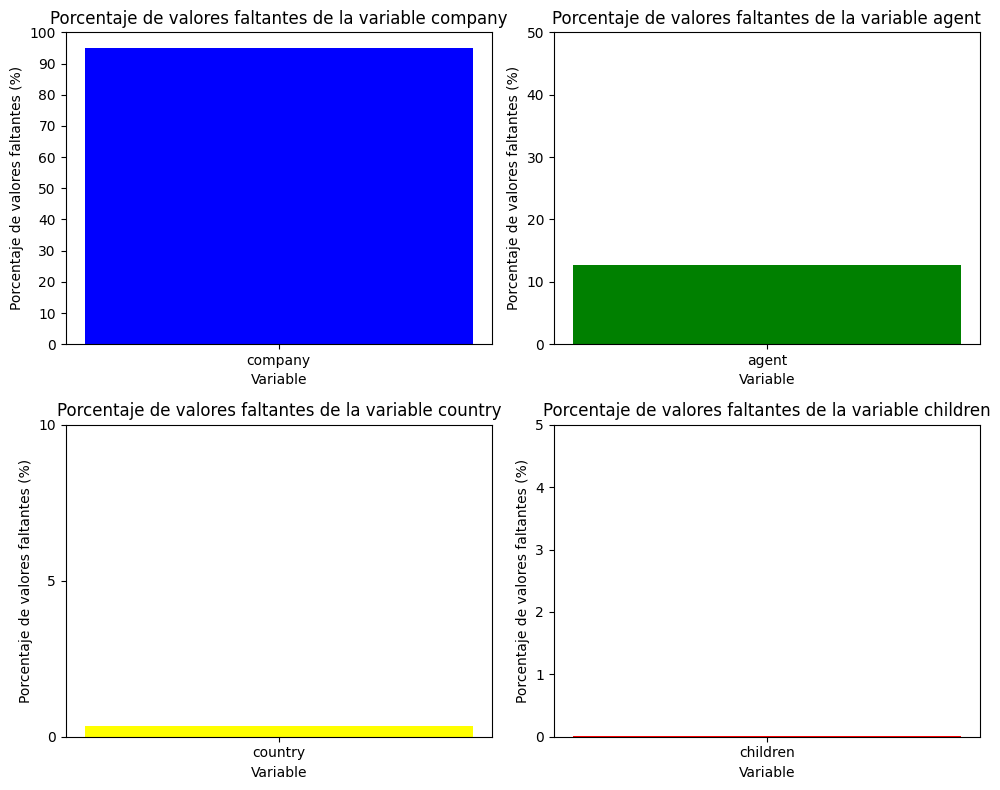

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

total_filas = hotels.shape[0]

valores_faltantes = hotels['company'].isna().sum()

porcentaje_faltante = (valores_faltantes / total_filas) * 100

axes[0, 0].bar(x=['company'], height=[porcentaje_faltante], color="blue")
axes[0, 0].set_title('Porcentaje de valores faltantes de la variable company')
axes[0, 0].set_xlabel('Variable')
axes[0, 0].set_ylabel('Porcentaje de valores faltantes (%)')
axes[0, 0].set_yticks(range(0, 101, 10)) # muestra los números cada 10 unidades desde 0 hasta 100

valores_faltantes = hotels['agent'].isna().sum()

porcentaje_faltante = (valores_faltantes / total_filas) * 100

axes[0, 1].bar(x=['agent'], height=[porcentaje_faltante], color="green")
axes[0, 1].set_title('Porcentaje de valores faltantes de la variable agent')
axes[0, 1].set_xlabel('Variable')
axes[0, 1].set_ylabel('Porcentaje de valores faltantes (%)')
axes[0, 1].set_yticks(range(0, 101, 10))
axes[0, 1].set_ylim(0, 50)  # ajustar límites del eje y

valores_faltantes = hotels['country'].isna().sum()

porcentaje_faltante = (valores_faltantes / total_filas) * 100

axes[1, 0].bar(x=['country'], height=[porcentaje_faltante], color="yellow")
axes[1, 0].set_title('Porcentaje de valores faltantes de la variable country')
axes[1, 0].set_xlabel('Variable')
axes[1, 0].set_ylabel('Porcentaje de valores faltantes (%)')
axes[1, 0].set_yticks(range(0, 101, 5))
axes[1, 0].set_ylim(0, 10)

valores_faltantes = hotels['children'].isna().sum()

porcentaje_faltante = (valores_faltantes / total_filas) * 100

axes[1, 1].bar(x=['children'], height=[porcentaje_faltante], color="red")
axes[1, 1].set_title('Porcentaje de valores faltantes de la variable children')
axes[1, 1].set_xlabel('Variable')
axes[1, 1].set_ylabel('Porcentaje de valores faltantes (%)')
axes[1, 1].set_yticks(range(0, 101, 1))
axes[1, 1].set_ylim(0, 5)

plt.tight_layout()
plt.show()


### **Datos faltantes por filas**

Algunas filas presentan datos mal ingresados, realizamos un analisis mas en profundidad con algunos datos peculiares en las filas, observando los valores dados por el cuadro en analisis exploratorio, tales como la mínima y la máxima.

* Con respecto a la variable *adr*, no consideraremos los casos en los que la variable sea negativa, no se admite que un precio tenga valor negativo.

In [ ]:
hotels_adr = hotels.sort_values('adr')
hotels_adr.loc[:, 'adr']

21124     -6.38
3121       0.00
45181      0.00
9833       0.00
55651      0.00
          ...  
60071    402.00
8690     426.25
54002    437.00
50240    450.00
55460    510.00
Name: adr, Length: 61913, dtype: float64

In [ ]:
indices = hotels.loc[hotels['adr'] < 0].index
hotels = hotels.drop(indices).reset_index(drop=True)

### **Toma de decisiones sobre datos faltantes o mal ingresados**

* Tomando en cuenta estos resultados, decidimos eliminar la variable *company* debido a que el porcentaje de datos faltantes es casi total, teniendo un 94% de datos faltantes

In [ ]:
hotels.drop(['company'], axis=1, inplace = True)

* En el caso de la variable *children*, reemplazaremos los valores faltantes con el numero 0, dado que el porcentaje de datos faltantes es muy bajo (inferior al 1%). La media de los valores en esta variable es 0.1, por lo que al rellenar con 0, abarcamos los casos en los que no concurran con chicos.

In [ ]:
hotels['children'] = hotels['children'].fillna(0)
hotels['children']= hotels['children'].astype(int)

* Con respecto a la variable *country*, eliminamos las filas que tengan valores faltantes. El porcentaje de datos faltantes es inferior al 1%, y no vemos logico reemplazar los datos nulos con nombres aleatorios de otros paises ni con los de la media/mediana.

In [ ]:
hotels = hotels.dropna(subset=['country']).reset_index(drop=True)

* Por último, con el caso de la variable *agent*, rellenamos los espacios con datos faltantes con el valor "No agent", reprensentando que no hay agencia con la que haya hecho la reserva.

In [ ]:
hotels['agent'] = hotels['agent'].fillna("No agent")

In [ ]:
hotels["agent"].value_counts()

9.0         17003
No agent     7746
240.0        7359
1.0          4424
14.0         1699
            ...  
269.0           1
301.0           1
352.0           1
450.0           1
25.0            1
Name: agent, Length: 297, dtype: int64

Ya realizados los cambios, mostramos como se cambió el tipo de dato de la variable *children* a tipo entero, y *agent* a object.

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61691 entries, 0 to 61690
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61691 non-null  object 
 1   lead_time                       61691 non-null  int64  
 2   arrival_date_year               61691 non-null  int64  
 3   arrival_date_week_number        61691 non-null  int64  
 4   stays_in_weekend_nights         61691 non-null  int64  
 5   stays_in_week_nights            61691 non-null  int64  
 6   adults                          61691 non-null  int64  
 7   children                        61691 non-null  int64  
 8   country                         61691 non-null  object 
 9   market_segment                  61691 non-null  object 
 10  distribution_channel            61691 non-null  object 
 11  is_repeated_guest               61691 non-null  int64  
 12  previous_cancellations          

En la variable *agent* al poner 0 como una agencia, no la considerareoms para los futuros analisis, ya que ese 0 representa que no hay agencia, no hace referencia a una agencia cuyo nombre/número sea "0". Mostramos en una tabla que quedaron bastantes relacionadas con ese numero. 

In [ ]:
tabla = pd.crosstab(hotels['agent'], hotels['is_canceled'])
tabla

is_canceled,0,1
agent,,
1.0,753,3671
2.0,45,22
3.0,212,527
4.0,8,23
5.0,72,107
...,...,...
526.0,1,0
527.0,12,0
531.0,7,27


## d) Valores atípicos (incompleto)
En este apartado analizaremos la existencia de valores atípicos. Para este caso, vamos a identificar valores atípicos en los datos tanto en forma univariada como multivariada y justificar qué características poseen los datos atípicos detectados. Posteriormente realizaremos graficos que permitan ver estos mismos. 
Por último, vamos a mostrar el tratamiento a aplicar sobre estos.

###**Análisis univariado**

* Mediante el análisis de gráficos de tipo Box-Plot vamos a intentar identificar outliers univariados.

>Para los siguiente graficos no tomaremos en cuenta la variable cuantitativa *arrival_date_year* ya que solamente cuenta con los años 2015 a 2017. Tampoco consideraremos *arrival_date_week_number* ya que las semanas del año van de 1 a 53.

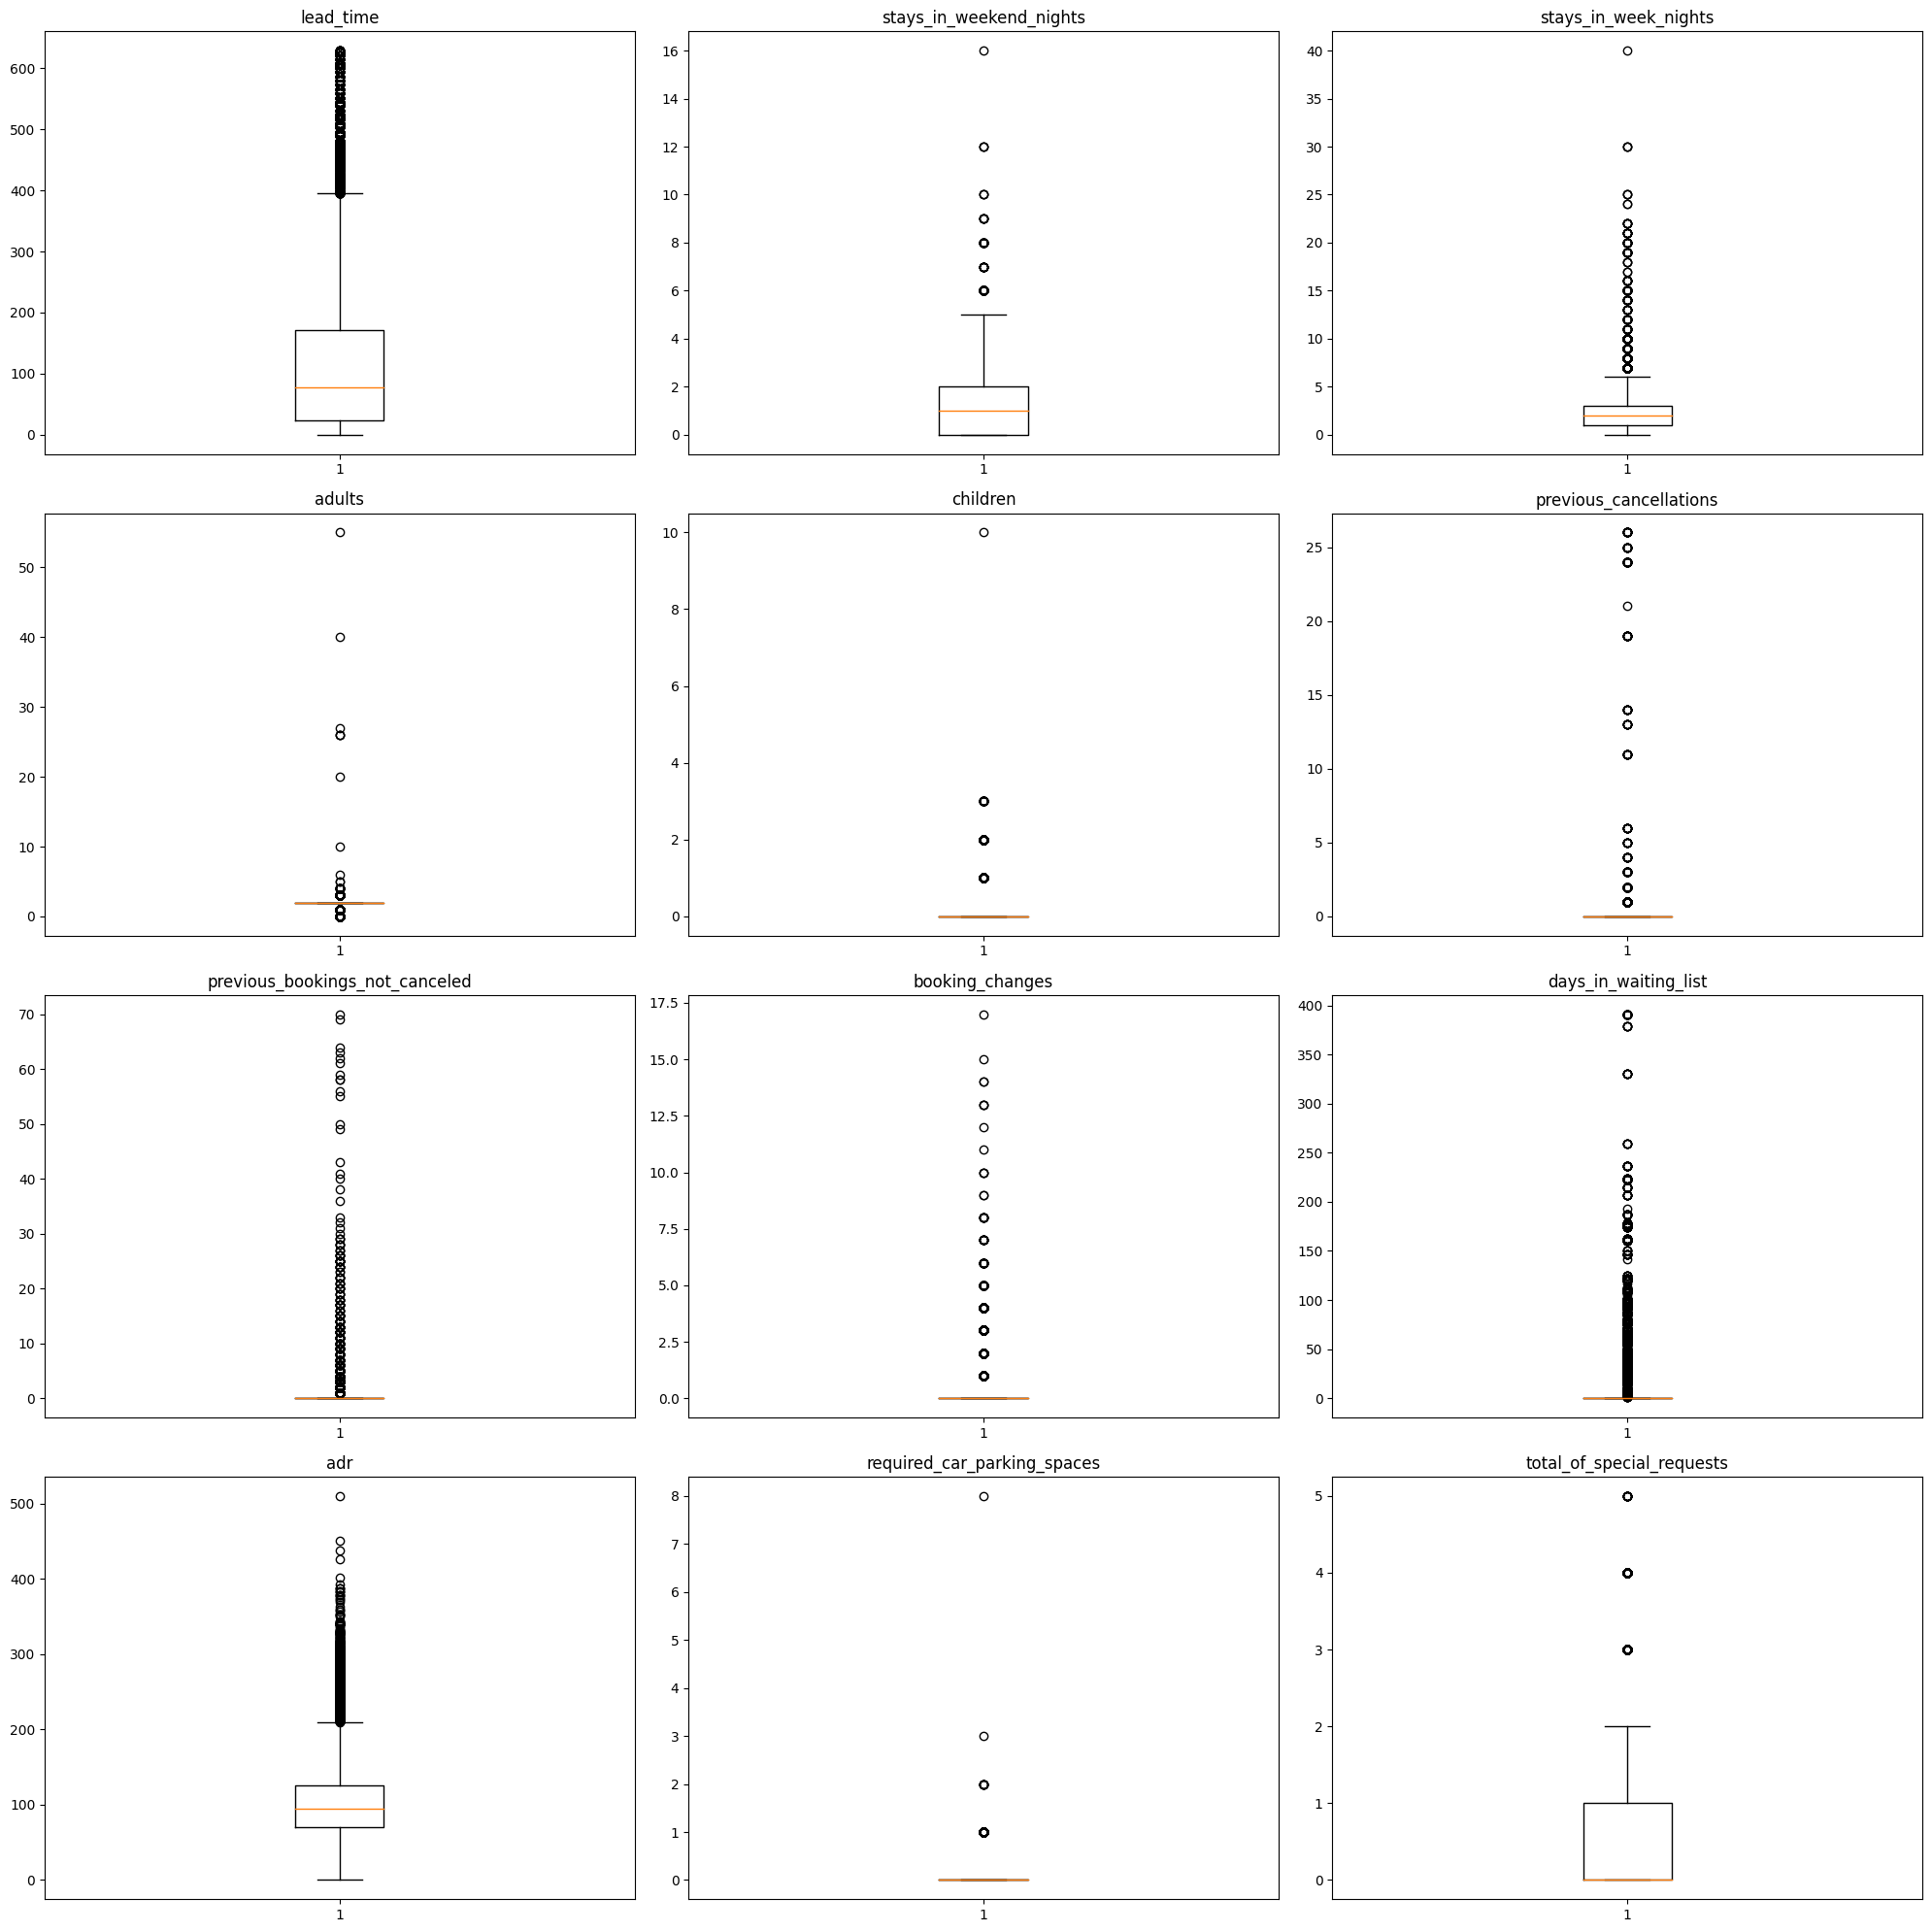

In [ ]:
vars_cuant = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
for var, ax in zip(vars_cuant, axs.flatten()):
    ax.boxplot(hotels[var])
    ax.set_title(var)

plt.tight_layout()
plt.show()


* De los boxplots, a simple vista resultan llamativos valores muy elevados en comparacion a los demás, tales como en *adults*, *children* y *days_in_waiting_list*.

> * En *adr* observamos que los valor inferiores a 1 son insgnificantes para el precio de un alojamiento.

In [ ]:
adr_0 = len(hotels[hotels["adr"]== 0])
print(f"Se presentan {adr_0} reservas con valor 0 en adr.")

Se presentan 875 reservas con valor 0 en adr.


In [ ]:
adr_menor_1 = len(hotels[(hotels['adr'] > 0) & (hotels['adr'] < 1)])
print(f"Se encuentra {adr_menor_1} reserva con valor entre 0 y 1 en adr.")

Se encuentra 1 reserva con valor entre 0 y 1 en adr.


Procedemos a eliminar esas filas:

In [ ]:
hotels = hotels.drop(hotels[(hotels['adr'] >= 0) & (hotels['adr'] < 1)].index).reset_index(drop=True)


> * En *adults* observamos que hay valores muy por arriba de la moda, pero no los consideramos como outliers, porque nos marca una tendencia de cancelacion cuando la cantidad de adultos supera a 5 adultos.

In [ ]:
hotels_adults = hotels.sort_values('adults', ascending= False)
hotels_adults.loc[:, 'adults']

37067    4
38723    4
2252     4
16882    4
25090    4
        ..
42554    0
1752     0
46661    0
9507     0
14634    0
Name: adults, Length: 60815, dtype: int64

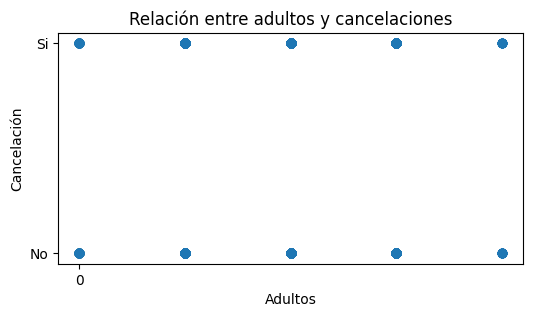

In [ ]:
plt.figure(figsize=(6, 3))
plt.scatter(x=hotels['adults'], y=hotels['is_canceled'])

plt.xlabel('Adultos')
plt.ylabel('Cancelación')
plt.title('Relación entre adultos y cancelaciones')

plt.xticks(range(0, max(hotels['adults']), 5))
plt.yticks([0, 1], ['No', 'Si'])
plt.show()

> Mostramos un gráfico de dispercíon en el que se observa lo dicho anteriormente en relación a las cancelaciones cuando la cantidad de adultos supera los 5.

> * En *children* observamos que el unico valor que esta por encima de los demas es el 10. Mostramos la fila posteriormente.

In [ ]:
hotels_children = hotels.sort_values('children', ascending= False)
hotels_children.loc[:, 'children']

48308    10
760       3
52437     3
40547     3
23230     3
         ..
21019     0
21020     0
21021     0
21022     0
60814     0
Name: children, Length: 60815, dtype: int64

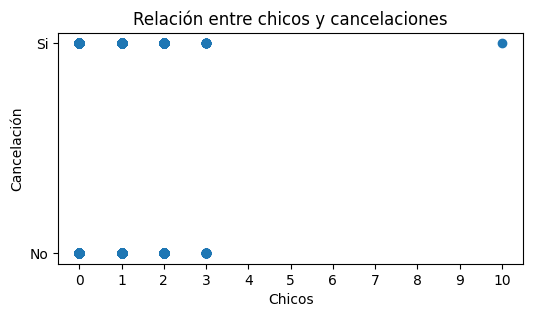

In [ ]:
plt.figure(figsize=(6, 3))
plt.scatter(x=hotels['children'], y=hotels['is_canceled'])

plt.xlabel('Chicos')
plt.ylabel('Cancelación')
plt.title('Relación entre chicos y cancelaciones')

plt.xticks(range(0, max(hotels['children'])+1, 1))
plt.yticks([0, 1], ['No', 'Si'])
plt.show()

In [ ]:
pd.crosstab(hotels['children'], hotels['is_canceled'])

is_canceled,0,1
children,,
0,27860,28544
1,1335,1096
2,853,1087
3,27,12
10,0,1


La relación entre los valores de children de 0 a 3 es muy pareja en comparacion a las cancelaciones, por lo que consideramos que la fila que contiene 10 chicos es un outlier. Procedemos a eliminarla.

In [ ]:
indices = hotels.loc[hotels['children'] > 3].index
hotels = hotels.drop(indices).reset_index(drop=True)

###**Análisis multivariado**

* Primero vamos a eliminar los casos en los que la cantidad de noches totales de la reserva sea igual a 0. Ya que tendria poco sentido realizar una reserva de 0 noches.

In [ ]:
hotels[hotels['total_nights'] == 0]

,hotel,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,country,market_segment,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights


In [ ]:
indices = hotels.loc[hotels['total_nights'] == 0].index
hotels = hotels.drop(indices).reset_index(drop=True)

* Consideramos que hay datos atipicos en *adults*, ya que no pueden haber reservas sin adultos, es decir no se podría dar el caso en el que una reserva no tenga adultos pero si chicos, o directamente que no tenga adultos ni chicos.

Contabilizamos los casos en los que hay reservas sin adultos pero con al menos 1 chico

In [ ]:
len(hotels[(hotels["adults"]== 0) & (hotels["children"] > 0)].index)

118

Contabilizamos los casos de reservas sin personas

In [ ]:
len(hotels[(hotels["adults"]== 0) & (hotels["children"] == 0)].index)

13

In [ ]:
sin_adultos = len(hotels[hotels["adults"]== 0].index)
print(f"En total hay {sin_adultos} reservas sin adultos")

En total hay 131 reservas sin adultos


Procedemos a eliminar las reservas que no haya adultos.

In [ ]:
indices = hotels.loc[hotels['adults'] == 0].index
hotels = hotels.drop(indices).reset_index(drop=True)

* Analizaremos si existen valores atipicos entre las variables de *stays_in_week_nights* y *stays_in_weekend_nights*. Para ello primeramente realizamos un scatterplot, y luego veremos valores atipicos calculando la distancia de mahalanobis entre estas dos variables.

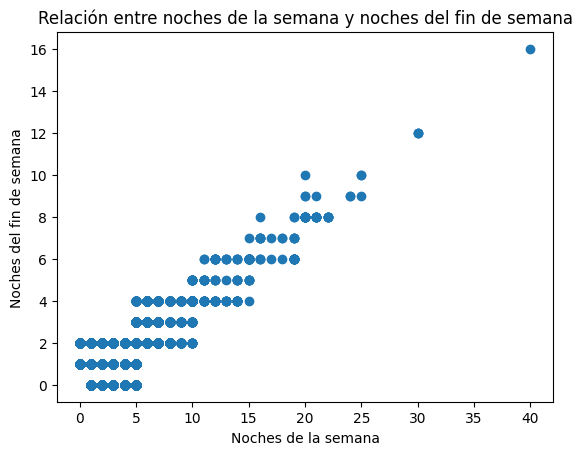

In [ ]:
plt.scatter(x=hotels['stays_in_week_nights'], y=hotels['stays_in_weekend_nights'])

plt.xlabel('Noches de la semana')
plt.ylabel('Noches del fin de semana')
plt.title('Relación entre noches de la semana y noches del fin de semana')

plt.show()


In [ ]:
def mahal_dists(X):
    sample_X = X.sample(frac=0.1)
    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T
    cov = np.cov(sample_X.values.T)
    inv_cov = inv(cov)
    W = linalg.sqrtm(inv_cov)
    Wx = np.matmul(W, X_diff)
    return np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

hotels_mahal = hotels.copy()

X = hotels_mahal[['stays_in_week_nights', 'stays_in_weekend_nights']]
hotels_mahal['mahal_dist_nights'] = mahal_dists(X)


In [ ]:
#Defino umbral
umbral=180

#Observacione anómalas
hotels_mahal[hotels_mahal['mahal_dist_nights']>umbral]

,hotel,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,country,market_segment,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights,mahal_dist_nights
30686,Resort Hotel,322,2017,2,16,40,2,0,PRT,Offline TA/TO,...,8.0,0,Transient,25.50,0,0,038d2833-ef4d-4678-8952-873dfd5ea166,1,56,486.611180
42802,Resort Hotel,242,2017,7,12,30,2,0,DEU,Offline TA/TO,...,75.0,0,Transient,35.70,0,1,2f056266-b2fd-4c10-a9ff-68feb0d34c86,0,42,261.801454
53310,Resort Hotel,122,2016,3,12,30,2,0,PRT,Offline TA/TO,...,8.0,0,Transient,22.11,0,0,636407b0-94e4-48b4-8d53-aa622249d3ea,1,42,261.801454
56284,Resort Hotel,214,2016,5,12,30,2,0,GBR,Offline TA/TO,...,8.0,0,Transient,31.45,0,0,b3edd9e8-d9f6-4aae-aa02-16c457af6ef4,0,42,261.801454


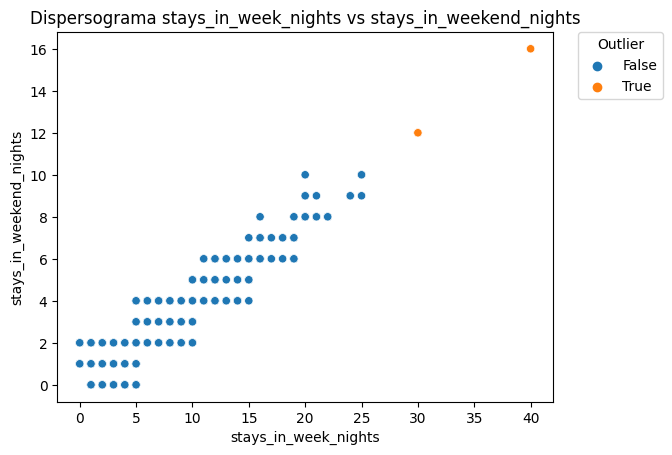

In [ ]:
#Grafico scatter
es_outlier = (hotels_mahal['mahal_dist_nights'] > umbral)
sns.scatterplot(x=hotels_mahal.stays_in_week_nights,y=hotels_mahal.stays_in_weekend_nights, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma stays_in_week_nights vs stays_in_weekend_nights')
plt.show()

* Buscamos si existen valores atipicos entre las variables de *total_nights*, *adr* y *adults*. Para ello haremos un grafico en 3d con la información que nos brinda la distancia de mahalanobis entre estas variables.

In [ ]:
X = hotels_mahal[['total_nights', 'adr','adults']]
hotels_mahal['mahal_dist_nights_adr_adults'] = mahal_dists(X)
np.sort(hotels_mahal.mahal_dist_nights_adr_adults)

array([9.61967621e-02, 9.62075223e-02, 9.62075223e-02, ...,
       2.32721142e+02, 2.33739545e+02, 4.30292254e+02])

In [ ]:
#Defino umbral
umbral=85

#Observacione anómalas
hotels_mahal[hotels_mahal['mahal_dist_nights_adr_adults']>umbral]

,hotel,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,country,market_segment,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights,mahal_dist_nights,mahal_dist_nights_adr_adults
3766,City Hotel,123,2017,3,10,20,3,0,AGO,Online TA,...,0,Transient,140.00,0,0,37701593-dc47-40a3-ba09-fdcf7d769807,1,30,126.733024,108.316299
5177,Resort Hotel,182,2017,9,8,22,2,2,RUS,Online TA,...,0,Transient,130.00,0,1,9cd638c4-6217-4870-b5ef-d0e82f322bfb,1,30,125.821920,107.494027
6286,City Hotel,9,2017,4,8,21,3,0,CPV,Online TA,...,0,Transient,133.36,0,1,73e4b997-45b7-4a5c-9a90-0b6824bc1e7d,1,29,115.577894,100.628432
9047,Resort Hotel,13,2016,18,9,24,2,0,PRT,Corporate,...,0,Transient,77.00,0,0,78c96b33-4f25-4f97-81d5-f63b0d64a201,1,33,155.000468,134.656495
9422,Resort Hotel,292,2017,24,8,19,1,0,PRT,Offline TA/TO,...,0,Contract,49.95,0,0,820bcfde-b519-473c-968e-dba01269e3e3,1,27,97.443441,93.667034
12209,Resort Hotel,73,2017,4,8,21,1,0,CN,Online TA,...,0,Transient,37.83,0,1,c2cbf793-facc-40c6-b43c-0103e0a4fe13,1,29,115.577894,109.835302
13935,City Hotel,25,2015,49,9,24,2,0,PRT,Direct,...,0,Transient,98.33,0,0,ed391057-b6cd-4c4b-a380-ec3180dbd9ec,1,33,155.000468,133.763554
14561,City Hotel,66,2016,48,8,20,2,2,AGO,Online TA,...,0,Transient,147.90,0,1,10ecc525-1927-4b4d-a9b8-b409707a855c,1,28,106.118401,92.080253
15395,Resort Hotel,131,2017,2,8,20,2,0,GBR,Online TA,...,0,Transient,54.35,0,0,7bc6b905-9baa-4c0c-818f-1e146c4f408d,0,28,106.118401,94.394584
17901,Resort Hotel,284,2016,3,8,20,2,0,PRT,Offline TA/TO,...,0,Transient,26.10,0,0,d8b0dc47-1d91-42d7-b3b4-e106123a972f,1,28,106.118401,96.799479


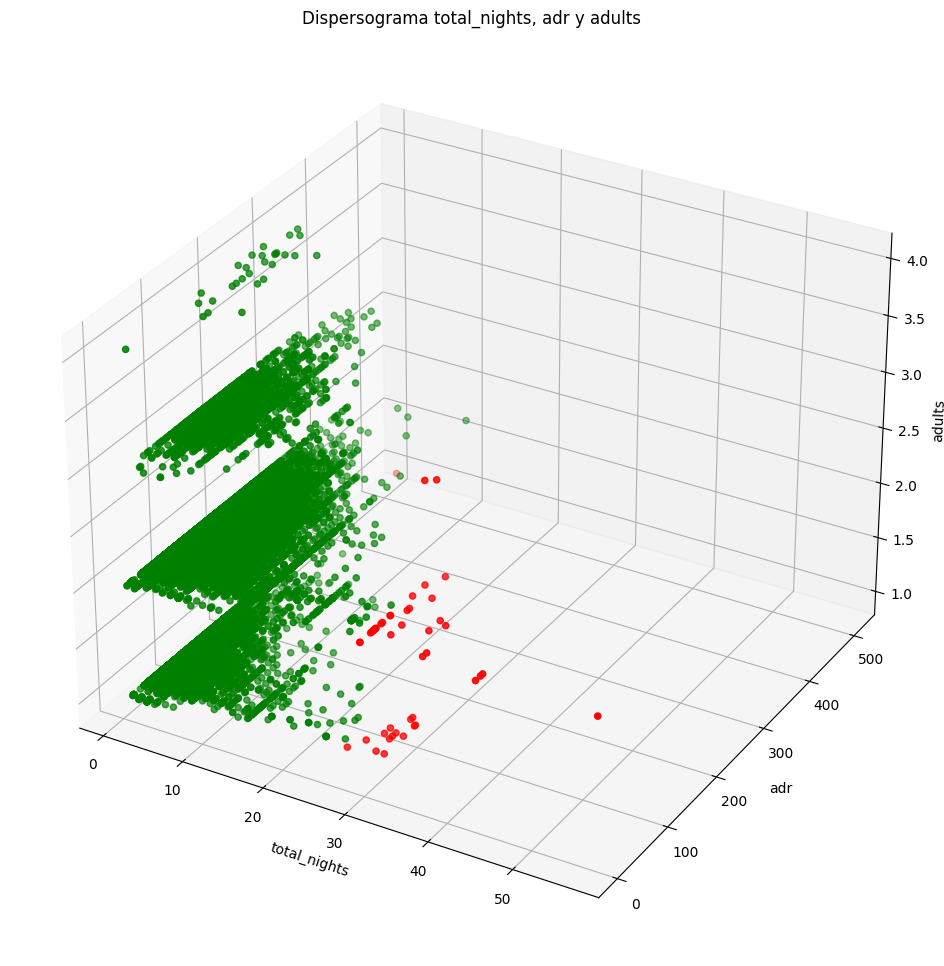

In [ ]:
#Gráfico 3D
es_outlier = (hotels_mahal['mahal_dist_nights_adr_adults'] > umbral)

color_outliers = 'r'
color_no_outliers = 'g'
colors = np.where(es_outlier, color_outliers, color_no_outliers)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

color=[f"C{n}" for n in (es_outlier*1)]
ax.scatter(hotels_mahal.total_nights,hotels_mahal.adr,hotels_mahal.adults,c=colors)
ax.set_xlabel('total_nights')
ax.set_ylabel('adr')
ax.set_zlabel('adults')
plt.title('Dispersograma total_nights, adr y adults')
plt.show()

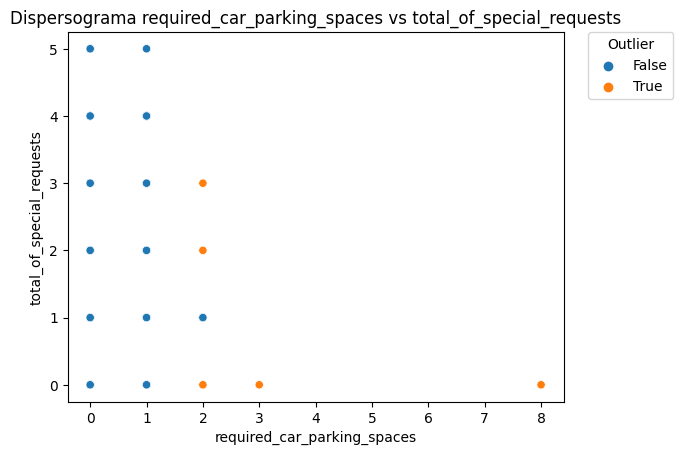

In [ ]:
X = hotels_mahal[['required_car_parking_spaces', 'total_of_special_requests']]
hotels_mahal['mahal_dist_parking_spaces_special_requests'] = mahal_dists(X)
#Defino umbral
umbral=80

#Grafico scatter
es_outlier = (hotels_mahal['mahal_dist_parking_spaces_special_requests'] > umbral)
sns.scatterplot(x=hotels_mahal.required_car_parking_spaces,y=hotels_mahal.total_of_special_requests, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma required_car_parking_spaces vs total_of_special_requests')
plt.show()

In [ ]:
#Observacione anómalas
hotels_mahal[hotels_mahal['mahal_dist_parking_spaces_special_requests']>umbral]

,hotel,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,country,market_segment,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,total_nights,mahal_dist_nights,mahal_dist_nights_adr_adults,mahal_dist_parking_spaces_special_requests
2124,Resort Hotel,223,2016,22,1,5,2,0,GBR,Groups,...,Transient-Party,52.00,2,0,53d1b052-1c99-4fe9-bfc6-690b33ab29ba,0,6,2.279803,2.600077,81.789205
8105,Resort Hotel,138,2017,12,2,2,2,0,AUT,Direct,...,Transient-Party,80.00,8,0,174365a6-2548-48c4-ae12-7842d5498f12,0,4,2.036924,0.479122,1339.435234
10826,Resort Hotel,0,2017,5,1,0,2,2,GBR,Direct,...,Transient-Party,85.00,2,0,1adeaaa0-261b-4cff-96f6-e2c773c07ea1,0,1,2.641756,1.300022,81.789205
11569,Resort Hotel,36,2016,11,2,5,2,0,POL,Online TA,...,Transient,59.14,2,2,0d29b1cc-ce3e-45e1-81a2-0ce1b1012ae1,0,7,2.206333,3.156957,81.333414
13427,Resort Hotel,205,2017,26,3,10,2,0,PRT,Direct,...,Transient,111.00,3,0,4267af65-0a89-4489-b099-e0332c6c51fe,0,13,17.522955,13.735175,185.800251
14081,Resort Hotel,44,2015,28,2,0,3,0,PRT,Online TA,...,Transient,225.00,2,0,6c61e85c-012f-482f-b4a2-2080453c8525,0,2,5.846648,10.753356,81.789205
21639,Resort Hotel,225,2016,22,2,3,2,0,GBR,Groups,...,Transient-Party,80.00,2,0,413a4fb7-2a0d-47c7-8af4-1723b5b02dfe,0,5,1.308861,0.784116,81.789205
37872,Resort Hotel,5,2017,9,1,5,2,0,NLD,Groups,...,Transient-Party,47.50,2,0,49eadee4-f7ec-4b3d-9a69-e8d174665741,0,6,2.279803,2.865871,81.789205
41787,Resort Hotel,169,2016,14,1,3,2,0,NLD,Groups,...,Transient-Party,78.00,2,0,c505c231-5643-4b23-815f-7b282ab173d3,0,4,0.070986,0.536221,81.789205
50250,Resort Hotel,180,2016,32,1,4,2,1,PRT,Online TA,...,Transient,187.80,2,3,6ab4883c-1387-4666-96f8-8e5fd485934b,0,5,0.783128,3.493703,86.289997


Vemos que por más que son outliers, es importante dejarlos, ya que son relevantes para nuestro objetivo. En totos los casos is_canceled es false.

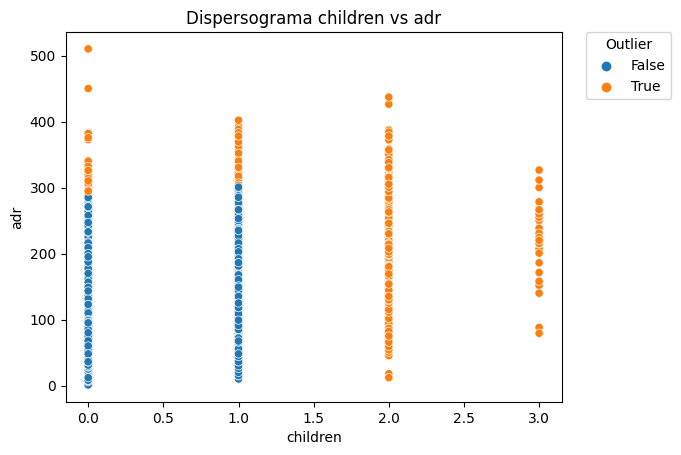

In [ ]:
X = hotels_mahal[['children', 'adr']]
hotels_mahal['mahal_dist_children_adr'] = mahal_dists(X)
#Defino umbral
umbral=18

#Grafico scatter
es_outlier = (hotels_mahal['mahal_dist_children_adr'] > umbral)
sns.scatterplot(x=hotels_mahal.children,y=hotels_mahal.adr, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma children vs adr')
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

df_isolation_forest = hotels[variables_cuantitativas2].copy()

# Instanciamos el modelo IsolationForest
model = IsolationForest(n_estimators=5000)

# Entrenamos el modelo
model.fit(df_isolation_forest)

# Predecimos las etiquetas de outliers (-1) y no outliers (1)
labels = model.predict(df_isolation_forest)

# Identificamos los outliers
df_outliers_isolation_forest = df_isolation_forest[labels == -1]

df_outliers_isolation_forest

,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
2,25,2016,42,0,1,2,2,0,0,0,0,229.00,0,2
5,1,2015,38,3,5,1,0,0,0,2,0,133.00,0,0
6,112,2015,46,4,9,2,0,0,0,1,0,66.42,0,1
11,349,2016,41,1,5,1,0,0,0,0,162,80.00,0,0
34,364,2016,42,2,6,1,0,0,0,2,0,60.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60636,153,2015,38,4,10,2,0,0,0,1,0,61.65,0,0
60637,13,2015,50,2,0,2,0,1,0,0,0,107.00,0,2
60657,148,2017,29,0,3,2,1,0,0,2,0,118.10,1,2
60660,4,2017,6,0,2,3,2,0,0,0,0,263.00,0,0


In [ ]:
df_es_outlier_isolation_forest = df_isolation_forest.isin(df_outliers_isolation_forest)
es_outlier_isolation_forest = df_es_outlier_isolation_forest.apply(lambda x: all(x), axis=1)

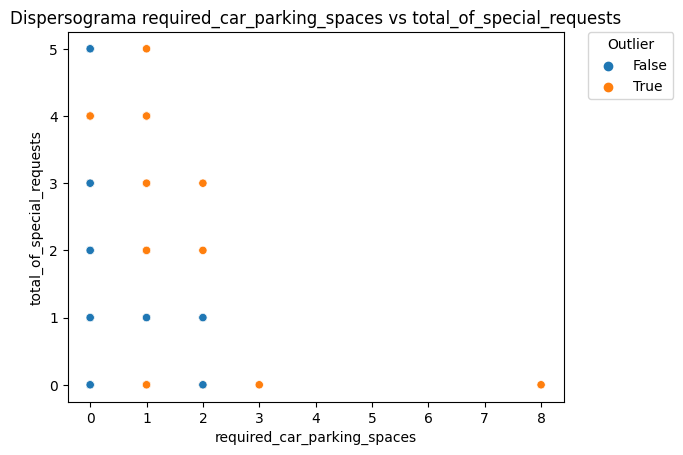

In [ ]:
sns.scatterplot(x=hotels.required_car_parking_spaces,y=hotels.total_of_special_requests, hue=es_outlier_isolation_forest)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma required_car_parking_spaces vs total_of_special_requests')
plt.show()

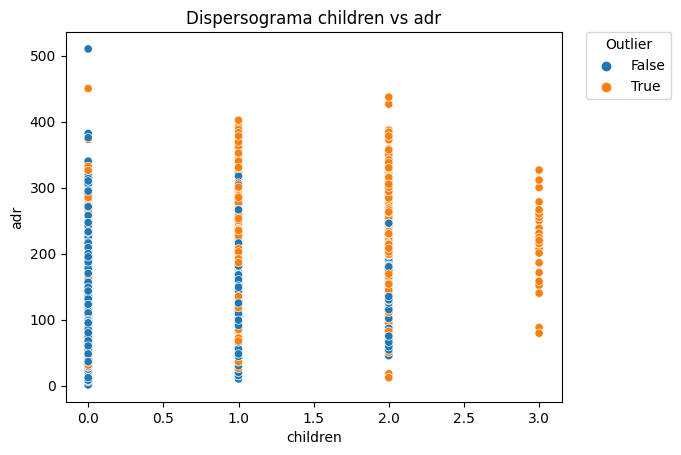

In [ ]:
sns.scatterplot(x=hotels.children,y=hotels.adr, hue=es_outlier_isolation_forest)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma children vs adr')
plt.show()

Comparando estos últimos dos graficos con los mismos graficos hechos con la Distancia de Mahalanobis, creemos que los outliers identificados por la Distancia de Mahalanobis son más apropiados.

* Reducimos la cantidad de variables, tales son los casos de stays_in_week_nights y stays_in_weekend_nights.

In [ ]:
hotels.drop(['stays_in_week_nights', 'stays_in_weekend_nights'], axis=1, inplace = True)

## Crear nuevo DataSet

In [ ]:
hotels.to_csv("new_hotel_train.csv", index=False)